# Machine Learning Approach to Sarcopenia Diagnosis

This project aims to predict sarcopenia, an age-related condition characterized by loss of skeletal muscle mass and function, which leads to severe health risks such as increased falls, frailty, and premature mortality. Contributing factors include aging, lifestyle habits, and chronic diseases like hypertension and diabetes. Effective early detection and understanding of the underlying relationships between muscle loss and these factors are crucial for mitigating health risks associated with sarcopenia. The approach to this predictive analysis is flexible, encouraging innovative methods to improve diagnostic accuracy.

# Preprocessing


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


In [2]:
#upload the CSV file
data = pd.read_csv('DataSampled.csv')

After uploading the dataset, we will examine the structure of the data, so as to get a better understanig of the problem and provide an effective solution. This examination will help us to identify the types of variables present, the count of non-null values, and basic statistical insights which are crucial for planning further preprocessing steps.

In [3]:
data.head()

MMSE  Age  Weight   Height   Waist     Hip  Smoking  Smoking (packet/year)  \
0   NaN   64     66.0    155.0    89.0  104.0      0.0                      0   
1   NaN   53     55.0    150.0    77.0   97.0      0.0                      0   
2  24.0   56     56.0    150.0   112.0  125.0      0.0                      0   
3   NaN   58     75.0    160.0   113.0    NaN      0.0                      0   
4  30.0   55     72.0    157.0    98.0  104.0      1.0                      4   

    Alcohol  DM   ...  Exercise  LowCST   CST  Gait speed  Low grip strength  \
0         0    0  ...         0     0.0   8.1        1.28                0.0   
1         0    0  ...       NaN     0.0   8.0        1.47                1.0   
2         0    0  ...         0     0.0  11.7        0.80                0.0   
3         0    1  ...         0     1.0  18.0        1.34                0.0   
4         0    0  ...  1-2/week     NaN  10.9        1.09                NaN   

  Grip strength  SARCOPENIA  STAR    BMI  Gender  
0          28.0         0.0  1.00  27.40       F  
1          16.0         0.0  1.84  24.40       F  
2          23.0         0.0  1.48  36.00       F  
3          23.0         0.0  1.12  29.30       F  
4          21.0         0.0  1.45  29.21       F  

[5 rows x 39 columns]

In [4]:
# List of selected columns
selected_columns = ['  Alcohol', 'Education', 'Working Status']

# Assuming 'df' is your DataFrame
for col in selected_columns:
    data[col] = data[col].apply(lambda x: x.lower() if isinstance(x, str) else x)

In [5]:
#Get shape of the data
data.shape

(1303, 39)

In [6]:
data.columns

Index(['MMSE', 'Age', 'Weight ', 'Height ', 'Waist ', 'Hip', 'Smoking',
       ' Smoking (packet/year)', '  Alcohol', 'DM ', 'DM duration', 'İnsülin',
       ' DM drug', 'Hiperlipidemi', 'Dyslipidemia duration',
       'Dyslipidemia drugs ', 'KAH', 'KAH duration', 'Hipotiroidi', 'ASTIM',
       'KOAH', 'OP', 'Other(s)', 'HT', 'Anti-HT drug type', 'HT duration',
       'Education', 'Occupation', 'Working Status', 'Exercise', 'LowCST',
       'CST', 'Gait speed', 'Low grip strength', 'Grip strength', 'SARCOPENIA',
       'STAR', 'BMI', 'Gender'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MMSE                    812 non-null    float64
 1   Age                     1303 non-null   int64  
 2   Weight                  1302 non-null   float64
 3   Height                  1301 non-null   float64
 4   Waist                   1297 non-null   float64
 5   Hip                     1296 non-null   float64
 6   Smoking                 1302 non-null   float64
 7    Smoking (packet/year)  1301 non-null   object 
 8     Alcohol               1303 non-null   object 
 9   DM                      1303 non-null   int64  
 10  DM duration             1289 non-null   float64
 11  İnsülin                 1297 non-null   float64
 12   DM drug                379 non-null    object 
 13  Hiperlipidemi           1301 non-null   float64
 14  Dyslipidemia duration   1287 non-null   

In [8]:
data.describe()

MMSE          Age      Weight       Height        Waist   \
count  812.000000  1303.000000  1302.000000  1301.000000  1297.000000   
mean    27.519704    61.348427    76.849693   160.322513    99.747880   
std      2.767765     9.724303    13.701356    10.022912    12.568456   
min     13.000000    44.000000    42.000000     1.590000    58.000000   
25%     27.000000    53.000000    68.000000   155.000000    92.000000   
50%     28.000000    61.000000    75.000000   160.000000   100.000000   
75%     30.000000    68.000000    85.000000   166.000000   108.000000   
max     30.000000    92.000000   150.000000   192.000000   152.000000   

               Hip      Smoking          DM   DM duration      İnsülin  ...  \
count  1296.000000  1302.000000  1303.000000  1289.000000  1297.000000  ...   
mean    109.384645     0.321813     0.303147     2.850202     0.060910  ...   
std      11.819345     0.467351     0.459795     6.048845     0.239257  ...   
min      15.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%     102.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%     108.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%     116.000000     1.000000     1.000000     2.000000     0.000000  ...   
max     191.000000     1.000000     1.000000    40.000000     1.000000  ...   

                HT  HT duration       LowCST          CST   Gait speed  \
count  1303.000000  1261.000000  1113.000000  1303.000000  1300.000000   
mean      0.634689     5.778699     0.318059    11.236761     0.988775   
std       0.481702     7.513770     0.465932     4.449019     0.281349   
min       0.000000     0.000000     0.000000     1.100000     0.250000   
25%       0.000000     0.000000     0.000000     8.800000     0.780000   
50%       1.000000     2.000000     0.000000    10.500000     0.980000   
75%       1.000000    10.000000     1.000000    12.600000     1.170000   
max       1.000000    55.000000     1.000000    50.000000     2.410000   

       Low grip strength  Grip strength   SARCOPENIA         STAR          BMI  
count        1166.000000    1303.000000  1302.000000  1295.000000  1301.000000  
mean            0.220412      26.947045     0.188940     1.226873    30.033651  
std             0.414702       9.291133     0.391611     0.308437     5.484643  
min             0.000000       7.000000     0.000000     0.490000    15.800000  
25%             0.000000      20.000000     0.000000     1.005000    26.300000  
50%             0.000000      25.000000     0.000000     1.200000    29.330000  
75%             0.000000      32.000000     0.000000     1.420000    32.900000  
max             1.000000      77.000000     1.000000     2.330000    57.100000  

[8 rows x 28 columns]

In [9]:
data.isnull().sum()

MMSE                       491
Age                          0
Weight                       1
Height                       2
Waist                        6
Hip                          7
Smoking                      1
 Smoking (packet/year)       2
  Alcohol                    0
DM                           0
DM duration                 14
İnsülin                      6
 DM drug                   924
Hiperlipidemi                2
Dyslipidemia duration       16
Dyslipidemia drugs        1072
KAH                         42
KAH duration                54
Hipotiroidi                 32
ASTIM                      123
KOAH                        78
OP                         948
Other(s)                  1018
HT                           0
Anti-HT drug type          553
HT duration                 42
Education                   20
Occupation                  66
Working Status              80
Exercise                    20
LowCST                     190
CST                          0
Gait speed                   3
Low grip strength          137
Grip strength                0
SARCOPENIA                   1
STAR                         8
BMI                          2
Gender                       0
dtype: int64

Columns that are not relevant to the analysis or contain excessive missing data are removed. This step is vital as it reduces the dimensionality of the dataset, focuses the models on significant features, and enhances computational efficiency.

In [10]:
data.drop(['STAR', 'DM duration', 'İnsülin', ' DM drug', 'Hiperlipidemi', 'Dyslipidemia duration',
                   'Dyslipidemia drugs ', 'KAH', 'KAH duration', 'Hipotiroidi', 'KOAH', 'OP', 'Other(s)',
                   'Anti-HT drug type', 'HT duration', 'MMSE', 'BMI','Occupation'], axis=1, inplace=True)

In [11]:
data.shape

(1303, 21)

In [12]:
data.SARCOPENIA.value_counts()

SARCOPENIA
0.0    1056
1.0     246
Name: count, dtype: int64

In [13]:
data.columns

Index(['Age', 'Weight ', 'Height ', 'Waist ', 'Hip', 'Smoking',
       ' Smoking (packet/year)', '  Alcohol', 'DM ', 'ASTIM', 'HT',
       'Education', 'Working Status', 'Exercise', 'LowCST', 'CST',
       'Gait speed', 'Low grip strength', 'Grip strength', 'SARCOPENIA',
       'Gender'],
      dtype='object')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     1303 non-null   int64  
 1   Weight                  1302 non-null   float64
 2   Height                  1301 non-null   float64
 3   Waist                   1297 non-null   float64
 4   Hip                     1296 non-null   float64
 5   Smoking                 1302 non-null   float64
 6    Smoking (packet/year)  1301 non-null   object 
 7     Alcohol               1303 non-null   object 
 8   DM                      1303 non-null   int64  
 9   ASTIM                   1180 non-null   float64
 10  HT                      1303 non-null   int64  
 11  Education               1283 non-null   object 
 12  Working Status          1223 non-null   object 
 13  Exercise                1283 non-null   object 
 14  LowCST                  1113 non-null   

To get a clearer understanding of our data and the problem, we will visualize our data and explore thier relationships

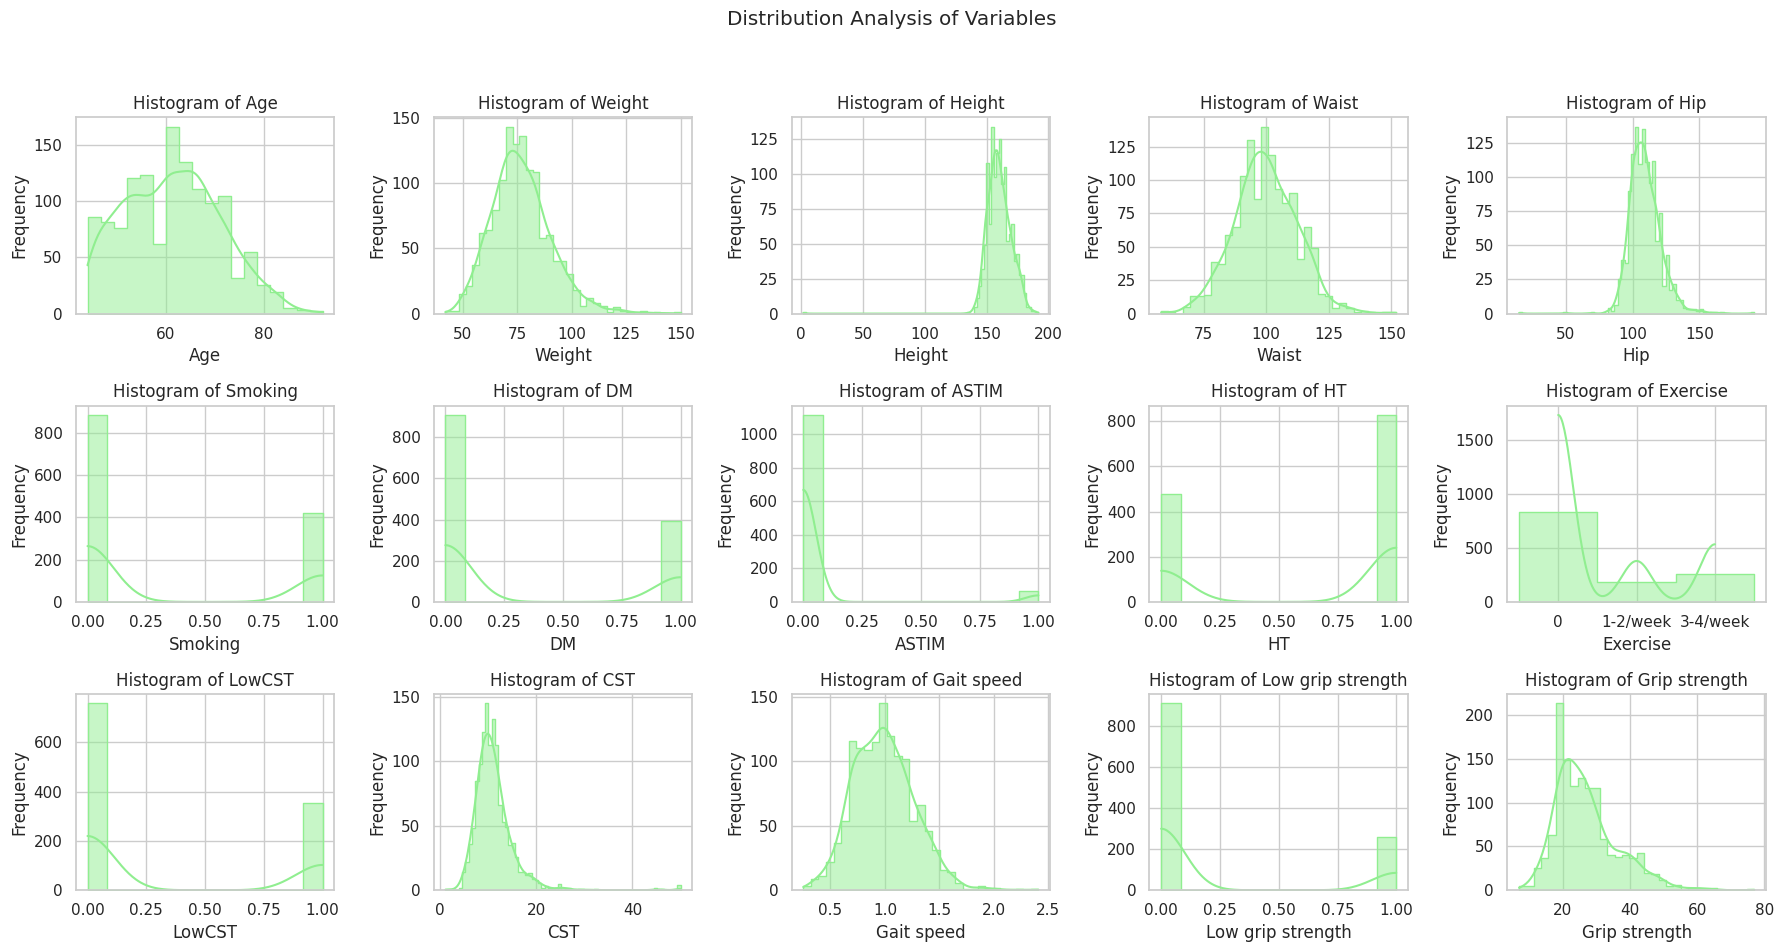

In [15]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 5, figsize=(18, 10))
fig.suptitle('Distribution Analysis of Variables')

# Variables to plot
variables_to_plot = ['Age', 'Weight ', 'Height ', 'Waist ', 'Hip', 'Smoking', 'DM ', 'ASTIM', 'HT',
                     'Exercise', 'LowCST','CST', 'Gait speed', 'Low grip strength', 'Grip strength']

# Plotting histograms and boxplots for selected variables
for ax, var in zip(axes.flatten(), variables_to_plot):
    # Histogram
    sns.histplot(data[var].dropna(), kde=True, ax=ax, color='lightgreen', element='step')
    ax.set_title(f'Histogram of {var.strip()}')
    ax.set_xlabel(var.strip())
    ax.set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

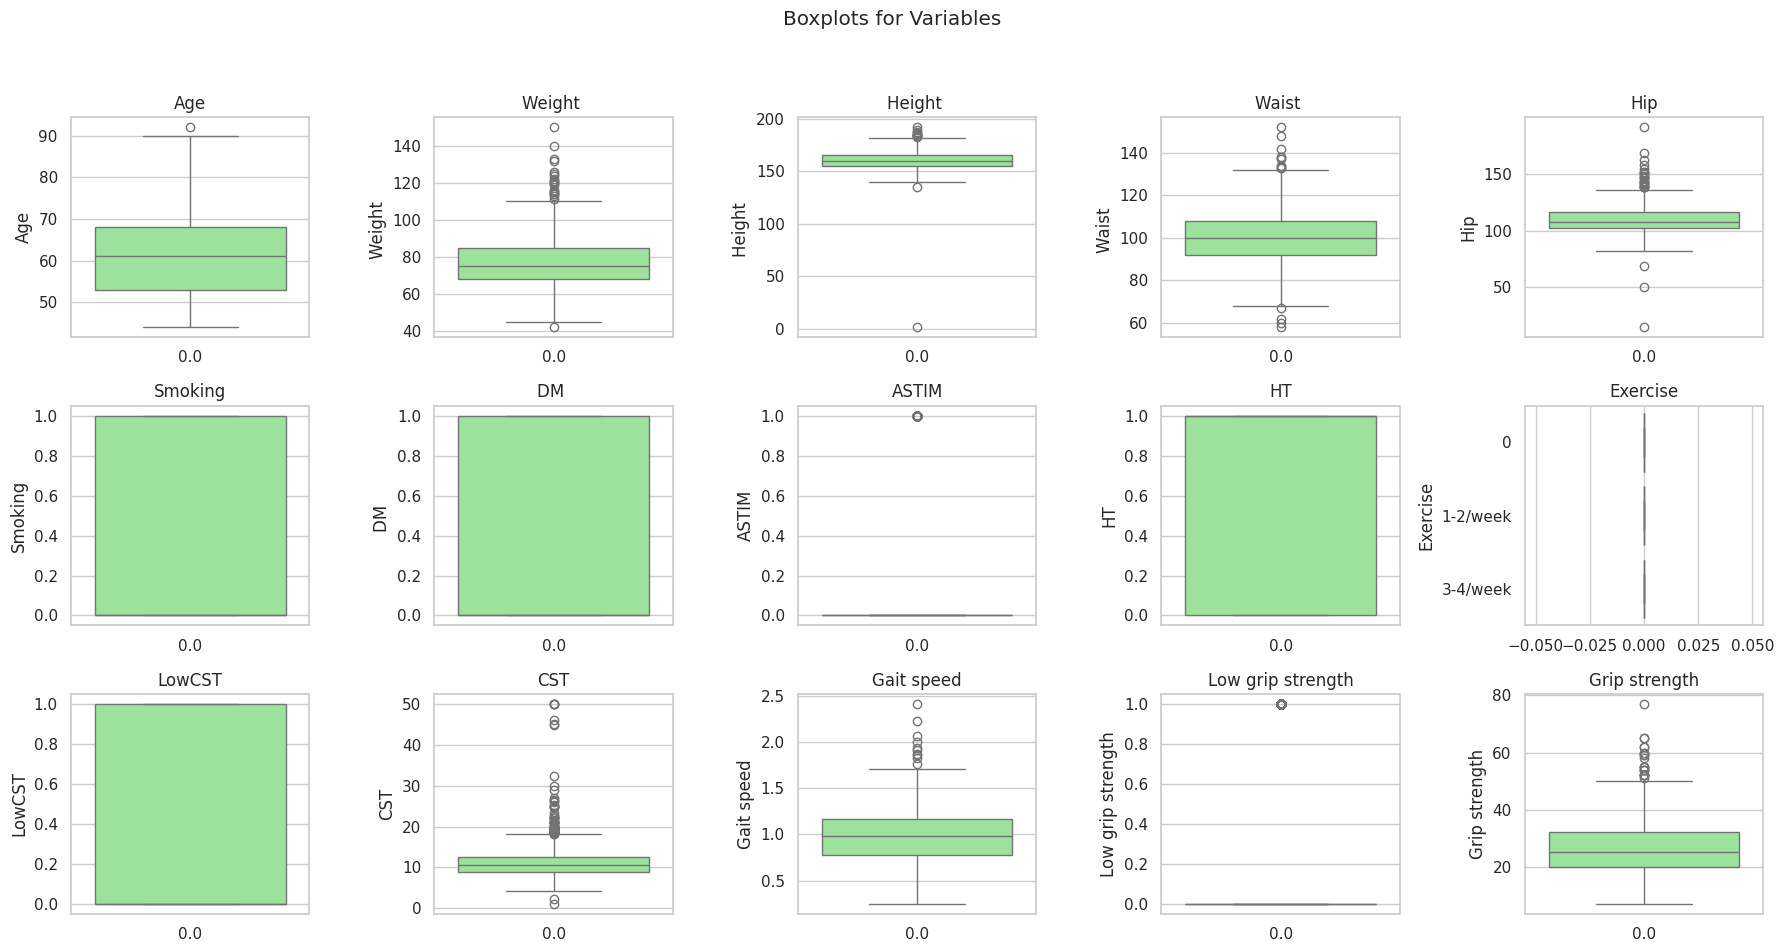

In [16]:
variables_to_plot = ['Age', 'Weight ', 'Height ', 'Waist ', 'Hip', 'Smoking', 'DM ', 'ASTIM', 'HT',
                     'Exercise', 'LowCST','CST', 'Gait speed', 'Low grip strength', 'Grip strength']

fig, axes = plt.subplots(3, 5, figsize=(18, 10))
fig.suptitle('Boxplots for Variables')

for ax, var in zip(axes.flatten(), variables_to_plot):
    sns.boxplot(x=np.zeros(data[var].dropna().shape), y=data[var].dropna(), ax=ax, color='lightgreen')
    ax.set_title(var)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

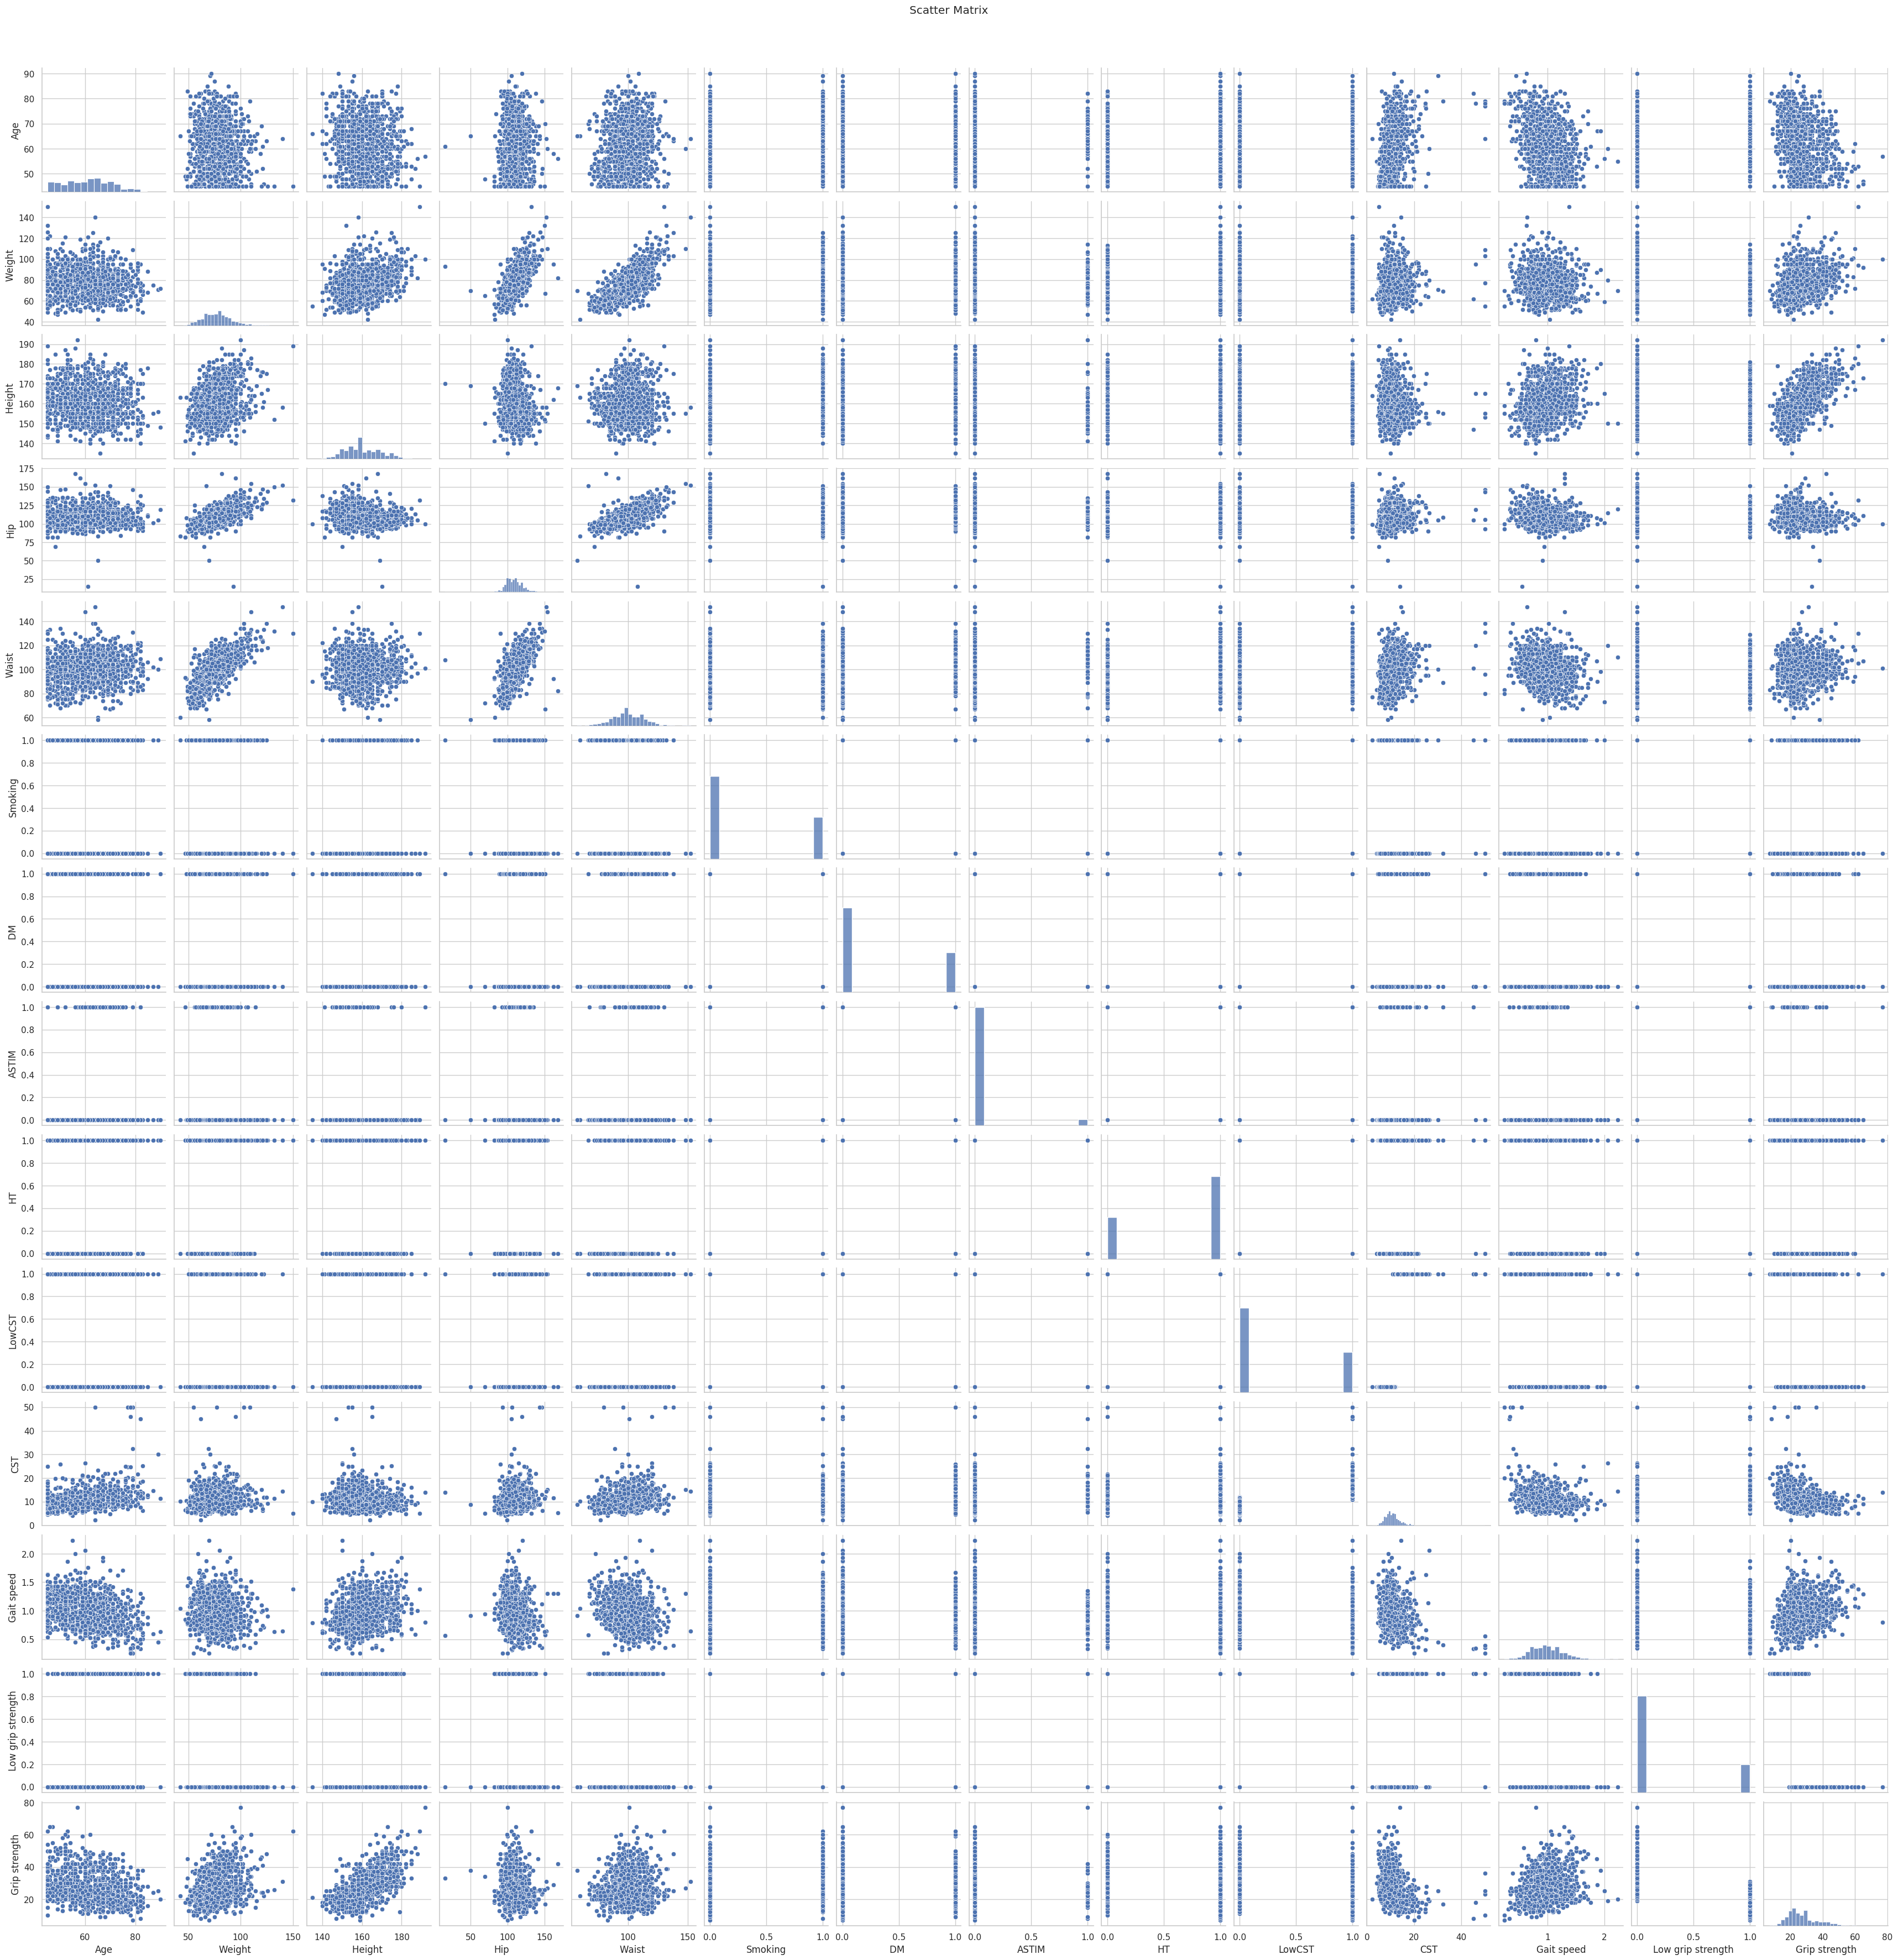

In [17]:
# Selecting a subset of variables for the pair plot
variables_for_pairplot = ['Age', 'Weight ', 'Height ', 'Hip', 'Waist ', 'Smoking', 'DM ', 'ASTIM', 'HT',
                     'Exercise', 'LowCST','CST', 'Gait speed', 'Low grip strength', 'Grip strength']

# Dropping missing values for clarity
pairplot_data = data[variables_for_pairplot].dropna()

# Creating the pair plot
sns.pairplot(pairplot_data)
plt.suptitle('Scatter Matrix', y=1.02)
plt.show()


<b>Observations from the Pair Plot:</b></br>
Scatter plots between variables such as weight, waist, and hip show positive linear relationships, indicating that these measurements tend to increase together.</br>
Diagonal plots (histograms) provide the distribution of individual variables, confirming previous observations about normality and skewness.</br>
Potential Clusters: The plots hint at clustering among certain variables which could be indicative of subgroups within the dataset based on demographic or physiological characteristics.

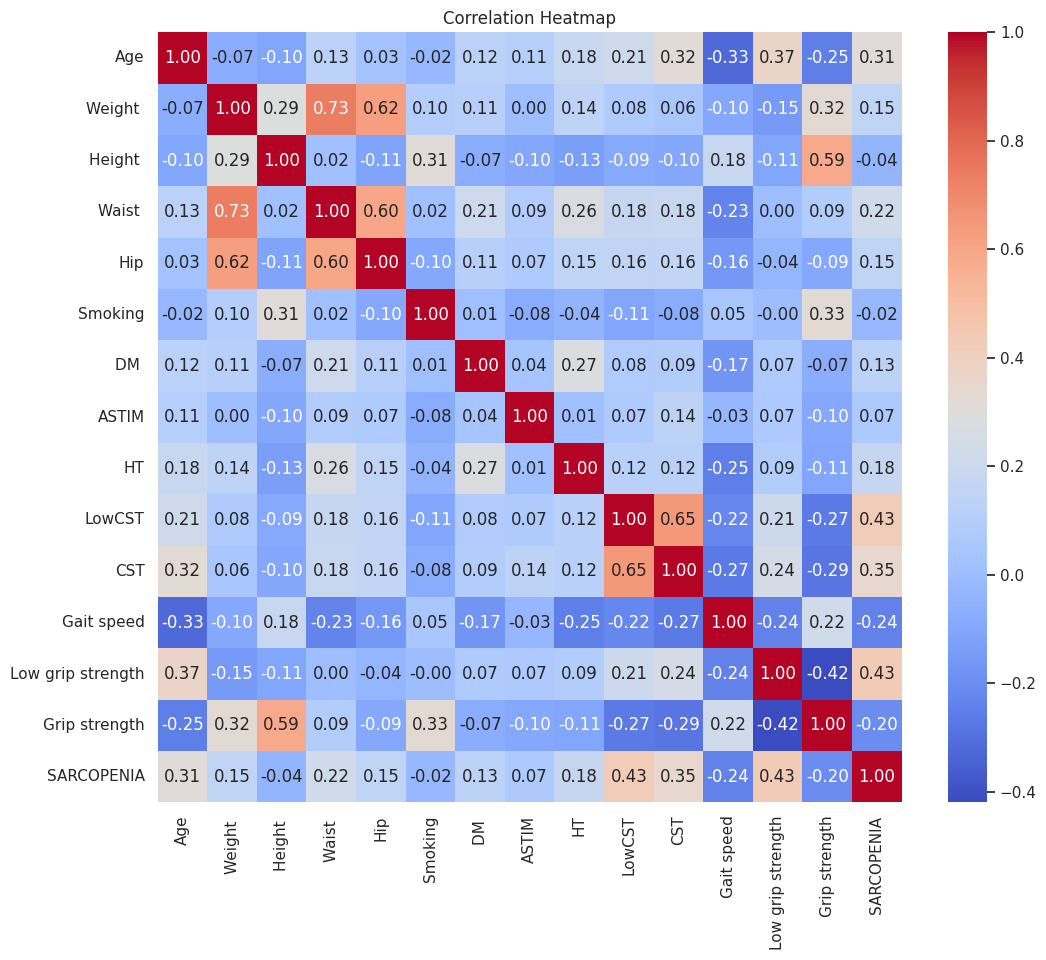

In [18]:
# correlation matrix for the numeric variables with NumPy included
correlation_matrix = data.select_dtypes(include=[np.number]).corr()

# Creating a heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Heatmap')
plt.show()

Positive values (red): indicate a positive correlation, meaning as one variable increases, the other also increases.</br>
Negative values (blue)" show a negative correlation, meaning as one variable increases, the other decreases.</br>
<b>Key Observations:</b></br>
Variables related to body measurements (like weight, height, waist, hip, and BMI) tend to have strong positive correlations with each other, which is expected.</br>
Age shows varying degrees of correlation with several variables, which might be useful in analyses that consider the impact of age on health markers or disease conditions.</br>
There are other interesting correlations that might warrant further investigation, especially in the context of specific health outcomes or conditions being studied.</br>

since waist and weight have a high correlation, we decide to drop waist

In [19]:
data.drop('Waist ', axis=1, inplace=True)

In [20]:
data.columns

Index(['Age', 'Weight ', 'Height ', 'Hip', 'Smoking', ' Smoking (packet/year)',
       '  Alcohol', 'DM ', 'ASTIM', 'HT', 'Education', 'Working Status',
       'Exercise', 'LowCST', 'CST', 'Gait speed', 'Low grip strength',
       'Grip strength', 'SARCOPENIA', 'Gender'],
      dtype='object')

In [21]:
data.shape

(1303, 20)

In [22]:
data.isnull().sum()

Age                         0
Weight                      1
Height                      2
Hip                         7
Smoking                     1
 Smoking (packet/year)      2
  Alcohol                   0
DM                          0
ASTIM                     123
HT                          0
Education                  20
Working Status             80
Exercise                   20
LowCST                    190
CST                         0
Gait speed                  3
Low grip strength         137
Grip strength               0
SARCOPENIA                  1
Gender                      0
dtype: int64

In [23]:
data.duplicated().sum()

0


### Convert Data Types
We prepare the data for more robust analysis by ensuring data types are correctly assigned and potential input errors are handled appropriately, thus increasing the reliability of subsequent statistical or machine learning outputs.

In [24]:
# Converting data types

data['Smoking'] = data['Smoking'].astype('object')
data['DM '] = data['DM '].astype('object')
data['ASTIM'] = data['ASTIM'].astype('object')
data['LowCST'] = data['LowCST'].astype('object')
data['Low grip strength'] = data['Low grip strength'].astype('object')
data['HT'] = data['HT'].astype('object')

# Ensure 'Smoking (packet/year)' is cleaned of any non-numeric entries first
data[' Smoking (packet/year)'] = pd.to_numeric(data[' Smoking (packet/year)'], errors='coerce')

# Convert 'Smoking (packet/year)' to integer
data[' Smoking (packet/year)'] = data[' Smoking (packet/year)'].fillna(0).astype(int)

# Displaying data info to confirm changes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     1303 non-null   int64  
 1   Weight                  1302 non-null   float64
 2   Height                  1301 non-null   float64
 3   Hip                     1296 non-null   float64
 4   Smoking                 1302 non-null   object 
 5    Smoking (packet/year)  1303 non-null   int64  
 6     Alcohol               1303 non-null   object 
 7   DM                      1303 non-null   object 
 8   ASTIM                   1180 non-null   object 
 9   HT                      1303 non-null   object 
 10  Education               1283 non-null   object 
 11  Working Status          1223 non-null   object 
 12  Exercise                1283 non-null   object 
 13  LowCST                  1113 non-null   object 
 14  CST                     1303 non-null   

**Detect and Remove Outliers:**
Outliers can significantly skew the results of our data analysis and statistical modeling so we will identify and remove the outliers so as te get a better result from our models. we will define our variables, ensure numerical data types, calculate Z-Scores, create a Mask for Numerical Outliers, Identify rare categories in categorical variables, combine masks, Remove Outliers and Print Results.


In [25]:
from scipy import stats

numerical_variables = ['Age', 'Weight ', 'Height ', 'Hip', ' Smoking (packet/year)', 'CST', 'Gait speed', 'Grip strength']

categorical_variables = ['Smoking', '  Alcohol', 'DM ', 'ASTIM', 'HT', 'Education',
                         'Working Status', 'Exercise', 'LowCST', 'Low grip strength']

# Ensuring all selected numerical columns are numeric before calculating Z-scores
data[numerical_variables] = data[numerical_variables].apply(pd.to_numeric, errors='coerce')

# Calculating Z-scores for the selected numerical variables
z_scores = np.abs(stats.zscore(data[numerical_variables]))

# Creating a mask for rows containing outliers in any of the selected numerical variables
outliers_mask_numerical = (z_scores > 3).any(axis=1)

# Creating a mask for rows containing rare categories in any of the selected categorical variables
outliers_mask_categorical = pd.concat([data[var].value_counts(normalize=True) < 0.01 for var in categorical_variables], axis=1).any(axis=1)

# Combining masks for numerical and categorical outliers
outliers_mask = outliers_mask_numerical | outliers_mask_categorical

initial = data.shape

# Removing outliers
data = data[~outliers_mask]

# Confirming removal of outliers
print("Shape of data before removing outliers:", initial)
print("Shape of data after removing outliers:", data.shape)


Shape of data before removing outliers: (1303, 20)
Shape of data after removing outliers: (1245, 20)


In [26]:
data['Education']

0          high school
1                  NaN
2           illiterate
3           illiterate
4              ilkokul
             ...      
1298       high school
1299       high school
1300    primary school
1301       high school
1302        university
Name: Education, Length: 1245, dtype: object

In [27]:
#Create pipeline
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [28]:
data.columns

Index(['Age', 'Weight ', 'Height ', 'Hip', 'Smoking', ' Smoking (packet/year)',
       '  Alcohol', 'DM ', 'ASTIM', 'HT', 'Education', 'Working Status',
       'Exercise', 'LowCST', 'CST', 'Gait speed', 'Low grip strength',
       'Grip strength', 'SARCOPENIA', 'Gender'],
      dtype='object')

To ensure uniformity and prevent classification errors due to case sensitivity, string values in certain columns such as 'Alcohol', 'Education', and 'Working Status' are converted to lowercase, special characters are also replaced

In [29]:
features = ['  Alcohol', 'Education', 'Working Status', 'Exercise']
unique_values = {column: data[column].unique().tolist() for column in data[features]}
unique_values

{'  Alcohol': ['0', 'social', 'regular', 'social '],
 'Education': ['high school',
  nan,
  'illiterate',
  'ilkokul',
  'secondary school',
  'university',
  'primary school',
  'highschool',
  'middle school',
  'housewife',
  'illeterate',
  'i̇lliterate',
  'üniversite',
  'lise',
  'okur-yzar değil',
  'ortaokul',
  'none',
  'ılliterate',
  'worker '],
 'Working Status': ['retire',
  nan,
  'retired',
  'unemployed',
  'çalışmıyor',
  'full-time/part-time work',
  'not working',
  'retired or not working',
  'working',
  'none',
  'emekli veya çalışmıyor',
  'full time/part-time work',
  'evhanımı',
  'emekli',
  'full-time',
  '#ref!',
  'full/part time',
  'full/part time work',
  'full time',
  'tam/kısmi zamanlı çalışıyor',
  'retd',
  'abstinence',
  'full time ',
  'çalışıyor',
  'emekli ',
  'calısıyor',
  'part-time',
  'full time work',
  'çalişiyor',
  'part time work',
  'fulltime',
  'tam/kısmi zamnalı çalışıyor',
  'ull-time/part-time work',
  'actively working'],
 '

In [30]:
# Replace all wrong values in alcohol
data['  Alcohol'].replace('social ', 'social', inplace=True)

<ipython-input-30-1fc0d00e258e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['  Alcohol'].replace('social ', 'social', inplace=True)


The dataset exhibits variability in terms such as educational qualifications and working statuses due to different entries referring to similar categories. Standardized mappings are applied to these columns to consolidate diverse terms into uniform categories. For example, multiple variations of 'high school' are all mapped to a single 'high school' category, which simplifies the dataset and aids in clearer analysis and better model performance.

In [31]:
# Define a mapping dictionary for replacement of education values

replacement_map = {
    'high school': 'high school',
    'illiterate': 'illiterate',
    'ilkokul': 'other',
    'secondary school': 'high school',
    'university': 'university',
    'primary school': 'primary school',
    'highschool': 'high school',
    'middle school': 'other',
    'housewife': 'other',
    'illeterate': 'illiterate',
    'i̇lliterate': 'illiterate',
    'üniversite': 'university',
    'lise': 'high school',
    'okur-yzar değil': 'other',
    'ortaokul': 'other',
    'none': 'other',
    'ılliterate': 'illiterate',
    'worker ': 'other'
}

data['Education'].replace(replacement_map, inplace=True)

In [32]:
# Define a mapping dictionary for replacement of working status

replacement_map_working_status = {
    'retire': 'retired',
    'unemployed': 'unemployed',
    'çalışmıyor': 'unemployed',
    'full-time/part-time work': 'working',
    'not working': 'unemployed',
    'retired or not working': 'unemployed',
    'working': 'working',
    'none': 'unemployed',
    'emekli veya çalışmıyor': 'unemployed',
    'full time/part-time work': 'working',
    'evhanımı': 'unemployed',
    'emekli': 'retired',
    'full-time': 'working',
    '#ref!': 'unemployed',
    'full/part time': 'working',
    'full/part time work': 'working',
    'full time': 'working',
    'tam/kısmi zamanlı çalışıyor': 'working',
    'retd': 'retired',
    'abstinence': 'unemployed',
    'full time ': 'working',
    'çalışıyor': 'working',
    'emekli ': 'retired',
    'calısıyor': 'working',
    'part-time': 'working',
    'full time work': 'working',
    'çalişiyor': 'working',
    'part time work': 'working',
    'fulltime': 'working',
    'tam/kısmi zamnalı çalışıyor': 'working',
    'ull-time/part-time work': 'working',
    'actively working': 'working'
}

# Replace values using the mapping dictionary
data['Working Status'].replace(replacement_map_working_status, inplace=True)

<ipython-input-32-606c13ae509b>:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Working Status'].replace(replacement_map_working_status, inplace=True)


In [33]:
features = ['  Alcohol', 'Education', 'Working Status', 'Exercise']
unique_values = {column: data[column].unique().tolist() for column in data[features]}
unique_values

{'  Alcohol': ['0', 'social', 'regular'],
 'Education': ['high school',
  nan,
  'illiterate',
  'other',
  'university',
  'primary school'],
 'Working Status': ['retired', nan, 'unemployed', 'working'],
 'Exercise': ['0', nan, '1-2/week', '3-4/week']}

To prepare for modeling, we will split our data based on gender.

In [34]:
# Split the data based on gender

data_male = data[data['Gender'] == 'M']
data_female = data[data['Gender'] == 'F']

data_male.shape, data_female.shape

((344, 20), (843, 20))

# Model Development

* get subset of data with agreed features for model 1 (do this for both female and male)
* split each subset(female and male) into train and test
* train 3 models on each train set (3 models for male, 3 models for female)
* for each model, set the threshold to high (you can experiment with different thresholds and check confusion matrix for each threshold). The goal here is to ensure that there are no False Positives

# Diagnosis Level 1 - Male

In [35]:
data_male.shape

(344, 20)

In [36]:
data_male.columns

Index(['Age', 'Weight ', 'Height ', 'Hip', 'Smoking', ' Smoking (packet/year)',
       '  Alcohol', 'DM ', 'ASTIM', 'HT', 'Education', 'Working Status',
       'Exercise', 'LowCST', 'CST', 'Gait speed', 'Low grip strength',
       'Grip strength', 'SARCOPENIA', 'Gender'],
      dtype='object')

In [37]:
Xm = data_male.drop(['SARCOPENIA', 'CST', 'Gait speed', 'LowCST', 'Low grip strength', 'Grip strength', 'Gender'], axis = 1)

In [38]:
ym = data_male.SARCOPENIA

In [39]:
Xm.shape, ym.shape

((344, 13), (344,))

In [40]:
Xm.head()

Age  Weight   Height     Hip Smoking   Smoking (packet/year)   Alcohol  \
5    57     98.0    179.0  100.0     1.0                      30    social   
9    76     70.0    168.0  109.0     0.0                       0         0   
12   71    108.0    164.0  121.0     1.0                      25         0   
16   51     82.0    178.0  103.0     1.0                      35    social   
23   72     64.0    163.0  100.0     0.0                       0         0   

   DM  ASTIM HT       Education Working Status  Exercise  
5    0   0.0  1     high school        retired  1-2/week  
9    1   NaN  1      university        retired  3-4/week  
12   1   0.0  1  primary school        working         0  
16   0   0.0  0     high school     unemployed         0  
23   0   0.0  0  primary school        retired         0

In [41]:
Xm.dtypes

Age                         int64
Weight                    float64
Height                    float64
Hip                       float64
Smoking                    object
 Smoking (packet/year)      int64
  Alcohol                  object
DM                         object
ASTIM                      object
HT                         object
Education                  object
Working Status             object
Exercise                   object
dtype: object

In [42]:
ym

5       0.0
9       1.0
12      1.0
16      0.0
23      0.0
       ... 
1280    0.0
1285    0.0
1290    1.0
1298    1.0
1300    1.0
Name: SARCOPENIA, Length: 344, dtype: float64

In [43]:
ym.isnull().sum()

1

In [44]:
null_index = ym[ym.isnull()].index

null_index

Index([109], dtype='int64')

In [45]:
Xm.loc[null_index]

Age  Weight   Height   Hip Smoking   Smoking (packet/year)   Alcohol DM   \
109   69      NaN      NaN  NaN     1.0                      40   regular   0   

    ASTIM HT    Education Working Status Exercise  
109   NaN  1  high school        retired        0

In [46]:
data_male.loc[null_index]

Age  Weight   Height   Hip Smoking   Smoking (packet/year)   Alcohol DM   \
109   69      NaN      NaN  NaN     1.0                      40   regular   0   

    ASTIM HT    Education Working Status Exercise LowCST   CST  Gait speed  \
109   NaN  1  high school        retired        0    NaN  16.4        1.37   

    Low grip strength  Grip strength  SARCOPENIA Gender  
109               NaN           29.0         NaN      M

In [47]:
Xm = Xm.drop(null_index)
ym = ym.drop(null_index)

Xm.shape, ym.shape

((343, 13), (343,))

In [48]:
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm,ym, random_state=0, stratify=ym)

In [49]:
categorical = Xm_train.dtypes == object
numerical = Xm_train.dtypes != object

In [50]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical),
        ('cat', categorical_pipeline, categorical)
    ])

**Model 1: Logistic Regression**


---



In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


lr_pipeline = Pipeline([
    ('prep', preprocessor),
    ('est', LogisticRegression(solver='liblinear', random_state=42, max_iter=10000, penalty='l1'))
])

params = {
    'est__C': [0.1, 0.2, 0.3, 0.5, 1.0, 10]}

lr_grid = GridSearchCV(lr_pipeline, params, cv=5, return_train_score=True)
lr_grid.fit(Xm_train, ym_train)
print(f"Train Score: {lr_grid.score(Xm_train, ym_train):.2}")
print(f"Test Score: {lr_grid.score(Xm_test, ym_test):.2}")

Train Score: 0.77
Test Score: 0.78


In [52]:
lr_grid.best_params_

{'est__C': 1.0}

In [53]:
lr_m = LogisticRegression(solver='liblinear', random_state=42, max_iter=10000, penalty='l1', C=0.2)

lr_male = Pipeline([
    ('prep', preprocessor),
    ('est', lr_m)
])

lr_male.fit(Xm_train, ym_train)
print(f"Train Score: {lr_male.score(Xm_train, ym_train):.2}")
print(f"Test Score: {lr_male.score(Xm_test, ym_test):.2}")

Train Score: 0.78
Test Score: 0.78


Precision: 0.8
Recall: 0.18
F1-Score: 0.3
AUC: 0.82




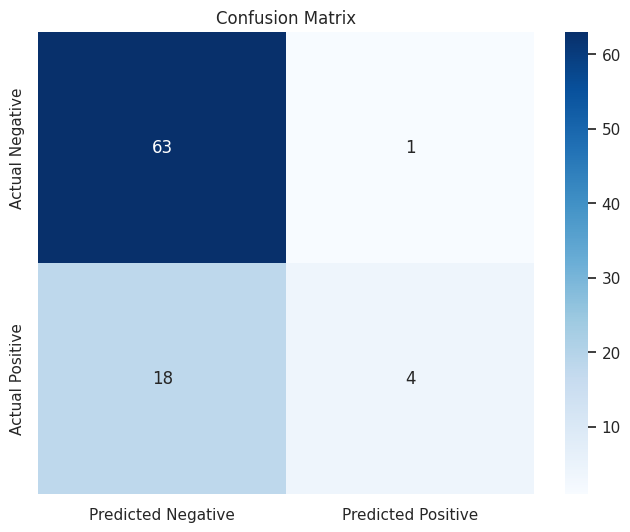

In [54]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on test data
ym_pred = lr_male.predict(Xm_test)
ym_proba = lr_male.predict_proba(Xm_test)[:, 1]

# Calculate precision, recall, f1-score, and AUC
precision = precision_score(ym_test, ym_pred)
recall = recall_score(ym_test, ym_pred)
f1 = f1_score(ym_test, ym_pred)
auc = roc_auc_score(ym_test, ym_proba)

print(f"Precision: {precision:.2}")
print(f"Recall: {recall:.2}")
print(f"F1-Score: {f1:.2}")
print(f"AUC: {auc:.2}\n\n")

# Calculate confusion matrix
cm = confusion_matrix(ym_test, ym_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.show()

**playing around with different thresholds to find out when FP = 0**

In [55]:
lr_metrics_values = [precision, recall, f1, auc]

Precision: 1.0
Recall: 0.18181818181818182
F1-score: 0.3076923076923077
New Confusion Matrix:




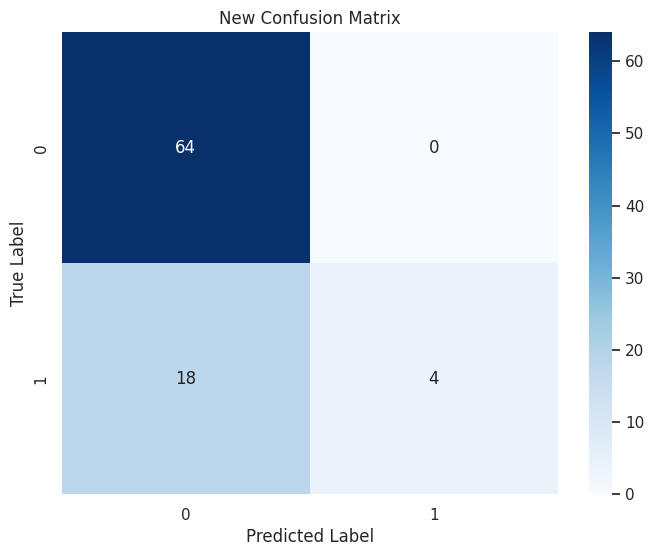

In [56]:
# Adjust the threshold
new_threshold = 0.51

# Apply new threshold to predicted probabilities to get binary predictions
new_y_pred = (ym_proba > new_threshold).astype(int)

# Evaluate the model with the new threshold
precision = precision_score(ym_test, new_y_pred)
recall = recall_score(ym_test, new_y_pred)
f1 = f1_score(ym_test, new_y_pred)
new_conf_matrix = confusion_matrix(ym_test, new_y_pred)

# Print evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("New Confusion Matrix:")
print('\n')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(new_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('New Confusion Matrix')
plt.show()

**Model 2: Random Forest Classifier**


---



In [57]:
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline([
    ('prep', preprocessor),
    ('est', RandomForestClassifier(random_state=42))
])

params = {
    'est__n_estimators': [100, 200, 300],
    'est__max_depth': [1, 2, 5, 10]}

rf_grid = GridSearchCV(rf_pipeline, params, cv=5, return_train_score=True)
rf_grid.fit(Xm_train, ym_train)
print(f"Train Score: {rf_grid.score(Xm_train, ym_train):.2}")
print(f"Test Score: {rf_grid.score(Xm_test, ym_test):.2}")

Train Score: 0.86
Test Score: 0.79


In [58]:
rf_grid.best_params_

{'est__max_depth': 5, 'est__n_estimators': 200}

In [59]:
rf_m = RandomForestClassifier(random_state=42, n_estimators = 200, max_depth = 5)

rf_male = Pipeline([
    ('prep', preprocessor),
    ('est', rf_m)
])

rf_male.fit(Xm_train, ym_train)
print(f"Train Score: {rf_male.score(Xm_train, ym_train):.2}")
print(f"Test Score: {rf_male.score(Xm_test, ym_test):.2}")

Train Score: 0.86
Test Score: 0.79


Precision: 0.83
Recall: 0.23
F1-Score: 0.36
AUC: 0.83



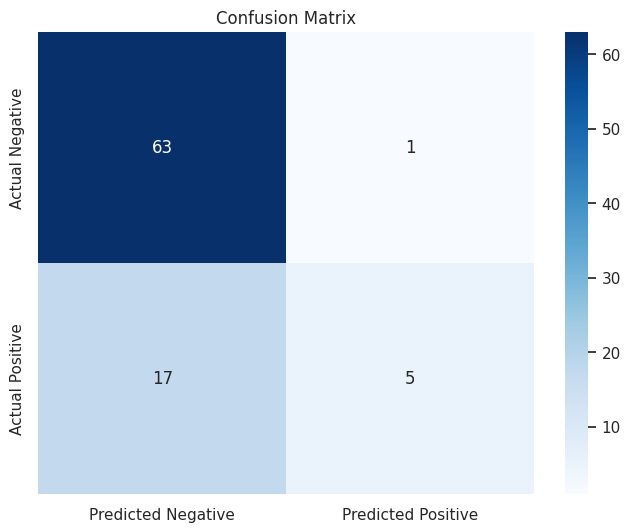

In [60]:
# Make predictions on test data
ym_pred = rf_male.predict(Xm_test)
ym_proba = rf_male.predict_proba(Xm_test)[:, 1]

# Calculate precision, recall, f1-score, and AUC
precision = precision_score(ym_test, ym_pred)
recall = recall_score(ym_test, ym_pred)
f1 = f1_score(ym_test, ym_pred)
auc = roc_auc_score(ym_test, ym_proba)

print(f"Precision: {precision:.2}")
print(f"Recall: {recall:.2}")
print(f"F1-Score: {f1:.2}")
print(f"AUC: {auc:.2}\n")

# Calculate confusion matrix
cm = confusion_matrix(ym_test, ym_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.show()

In [61]:
rfc_metrics_values = [precision, recall, f1, auc]

Precision: 1.0
Recall: 0.22727272727272727
F1-score: 0.37037037037037035
New Confusion Matrix:




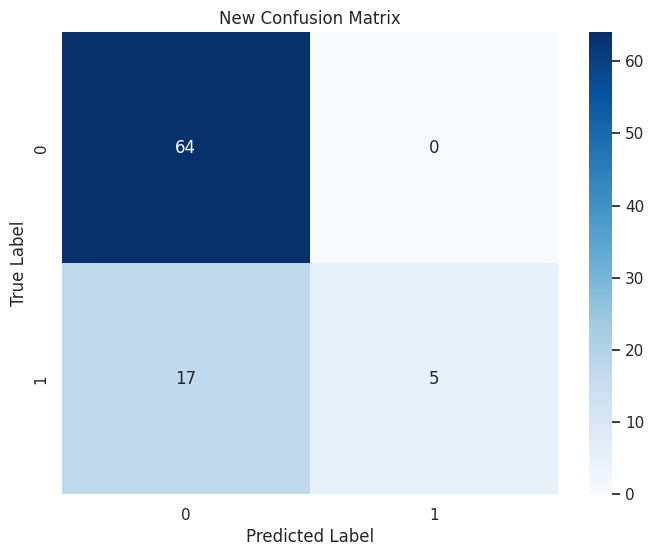

In [62]:
# Adjust the threshold
new_threshold = 0.51

# Apply new threshold to predicted probabilities to get binary predictions
new_y_pred = (ym_proba > new_threshold).astype(int)

# Evaluate the model with the new threshold
precision = precision_score(ym_test, new_y_pred)
recall = recall_score(ym_test, new_y_pred)
f1 = f1_score(ym_test, new_y_pred)
new_conf_matrix = confusion_matrix(ym_test, new_y_pred)

# Print evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("New Confusion Matrix:")
print('\n')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(new_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('New Confusion Matrix')
plt.show()

**Model 3: Gradient Boosting**


---



In [63]:
from sklearn.ensemble import GradientBoostingClassifier

gb_pipeline = Pipeline([
    ('prep', preprocessor),
    ('est', GradientBoostingClassifier(random_state=42))
])

params = {'est__n_estimators': [50, 60, 70, 80, 90, 100, 150, 200],
          'est__learning_rate': [0.01, 0.1, 0.5, 1],
          'est__max_depth': [1, 2, 3, 4, 5]}

gb_grid = GridSearchCV(gb_pipeline, params, cv=5, return_train_score=True)
gb_grid.fit(Xm_train, ym_train)
print(f"Train Score: {gb_grid.score(Xm_train, ym_train):.2}")
print(f"Test Score: {gb_grid.score(Xm_test, ym_test):.2}")

Train Score: 0.8
Test Score: 0.78


In [64]:
gb_grid.best_params_

{'est__learning_rate': 0.1, 'est__max_depth': 1, 'est__n_estimators': 50}

In [65]:
gb_m = GradientBoostingClassifier(random_state=42, n_estimators = 100, max_depth = 1, learning_rate=0.1)

gb_male = Pipeline([
    ('prep', preprocessor),
    ('est', gb_m)
])

gb_male.fit(Xm_train, ym_train)
print(f"Train Score: {gb_male.score(Xm_train, ym_train):.2}")
print(f"Test Score: {gb_male.score(Xm_test, ym_test):.2}")

Train Score: 0.82
Test Score: 0.81


Precision: 0.88
Recall: 0.32
F1-Score: 0.47
AUC: 0.74



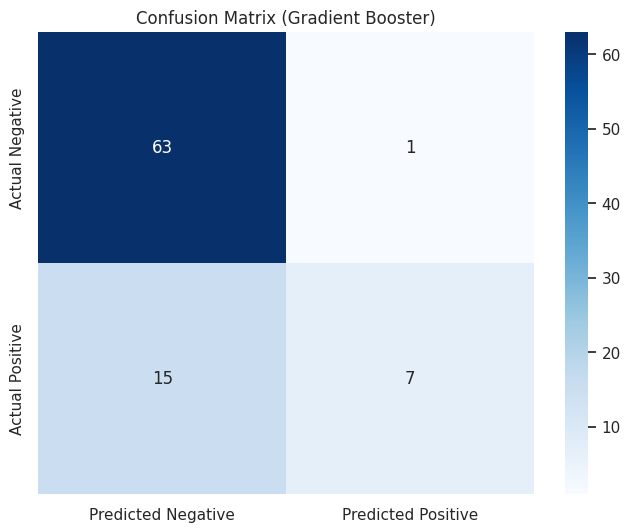

In [66]:
# Make predictions on test data
ym_pred = gb_male.predict(Xm_test)
ym_proba = gb_male.predict_proba(Xm_test)[:, 1]

# Calculate precision, recall, f1-score, and AUC
precision = precision_score(ym_test, ym_pred)
recall = recall_score(ym_test, ym_pred)
f1 = f1_score(ym_test, ym_pred)
auc = roc_auc_score(ym_test, ym_proba)

print(f"Precision: {precision:.2}")
print(f"Recall: {recall:.2}")
print(f"F1-Score: {f1:.2}")
print(f"AUC: {auc:.2}\n")

# Calculate confusion matrix
cm = confusion_matrix(ym_test, ym_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix (Gradient Booster)')
plt.show()

In [67]:
gb_metrics_values = [precision, recall, f1, auc]

Precision: 1.0
Recall: 0.09090909090909091
F1-score: 0.16666666666666666
New Confusion Matrix:




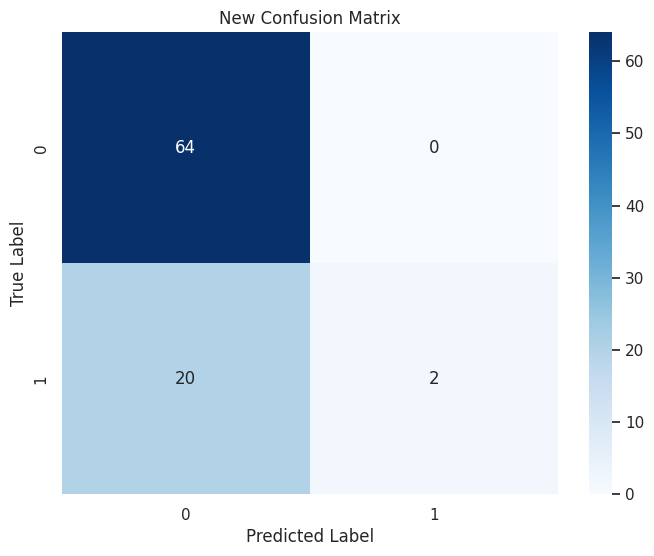

In [68]:
# Adjust the threshold
new_threshold = 0.68

# Apply new threshold to predicted probabilities to get binary predictions
new_y_pred = (ym_proba > new_threshold).astype(int)

# Evaluate the model with the new threshold
precision = precision_score(ym_test, new_y_pred)
recall = recall_score(ym_test, new_y_pred)
f1 = f1_score(ym_test, new_y_pred)
new_conf_matrix = confusion_matrix(ym_test, new_y_pred)

# Print evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("New Confusion Matrix:")
print('\n')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(new_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('New Confusion Matrix')
plt.show()

**Model Performance Comparison**


---



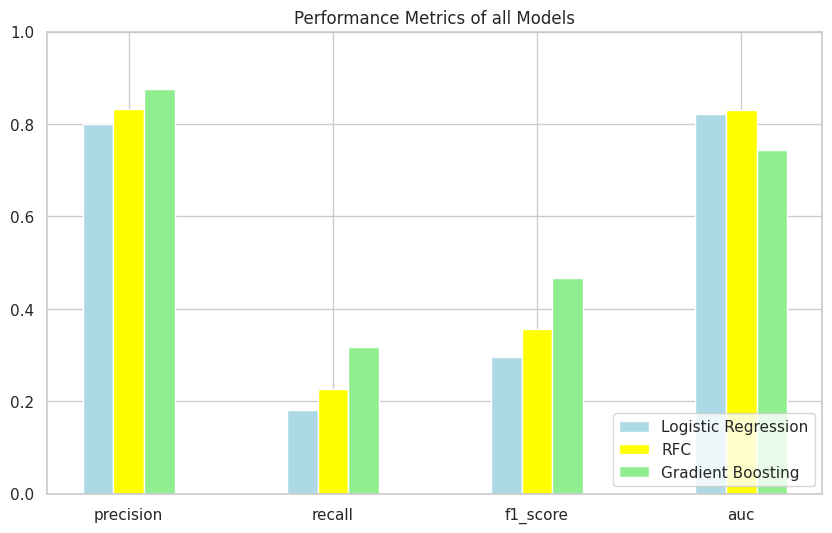

In [69]:
# Plotting the evaluation results
metrics_names = ['precision', 'recall', 'f1_score', 'auc']

x = np.arange(len(metrics_names))
bar_width = 0.15

plt.figure(figsize=(10, 6))

# Logistic Regressor
plt.bar(x - bar_width, lr_metrics_values, width=bar_width, color='lightblue', label='Logistic Regression')

# Random Forest Classifier
plt.bar(x, rfc_metrics_values, width=bar_width, color='yellow', label='RFC')

# Gradient Booster
plt.bar(x + bar_width, gb_metrics_values, width=bar_width, color='lightgreen', label='Gradient Boosting')


plt.xticks(x, metrics_names)
plt.title('Performance Metrics of all Models')
plt.ylim(0.0, 1.0)
plt.legend(loc='lower right')
plt.show()

**Plotting feature importance for all models**


---



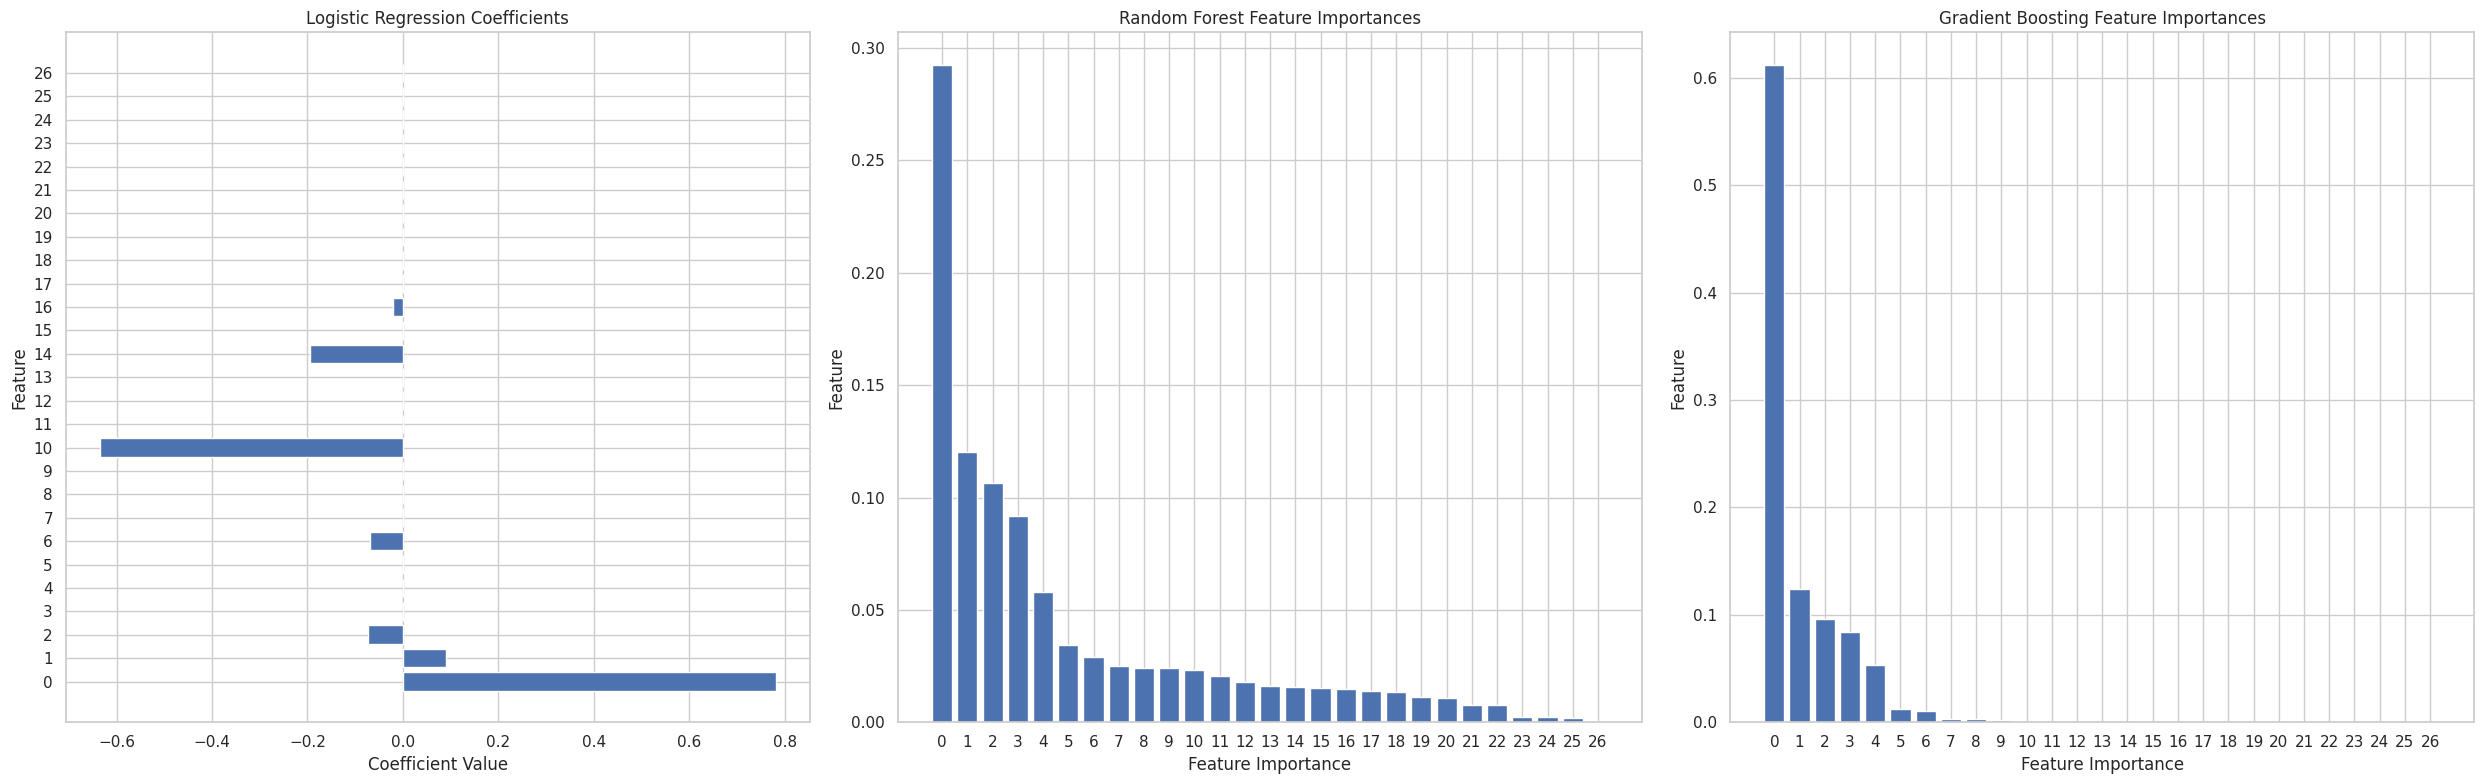

In [70]:
feature_names = lr_male.named_steps['prep'].transformers_[1][1]\
                .named_steps['encoder'].get_feature_names_out()

# Coefficients for logistic regression
lr_coefficients = lr_male.named_steps['est'].coef_[0]

# Feature importances for RFC
rf_importances = rf_male.named_steps['est'].feature_importances_
rf_indices = rf_importances.argsort()[::-1]

# Feature importances for Gradient Boosting
gb_importances = gb_male.named_steps['est'].feature_importances_
gb_indices = gb_importances.argsort()[::-1]


fig, axes = plt.subplots(1, 3, figsize=(25, 8))

# Logistic regression
axes[0].barh(range(len(lr_coefficients)), lr_coefficients, align="center")
axes[0].set_title("Logistic Regression Coefficients")
axes[0].set_yticks(range(len(lr_coefficients)))
# axes[0].set_yticklabels(feature_names)
axes[0].set_xlabel("Coefficient Value")
axes[0].set_ylabel("Feature")

# Random forest
axes[1].bar(range(len(rf_importances)), rf_importances[rf_indices], align="center")
axes[1].set_title("Random Forest Feature Importances")
axes[1].set_xticks(range(len(rf_importances)))
# axes[1].set_xticklabels(feature_names[rf_indices], rotation=90)
axes[1].set_xlabel("Feature Importance")
axes[1].set_ylabel("Feature")

# Gradient boosting
axes[2].bar(range(len(gb_importances)), gb_importances[gb_indices], align="center")
axes[2].set_title("Gradient Boosting Feature Importances")
axes[2].set_xticks(range(len(gb_importances)))
# axes[2].set_xticklabels(feature_names[gb_indices], rotation=90)
axes[2].set_xlabel("Feature Importance")
axes[2].set_ylabel("Feature")


plt.tight_layout()
plt.show()

# Diagnosis Level 2 - Male

Additional data: LowCST, CST, Gait Speed

In [71]:
data_male.shape

(344, 20)

In [72]:
data_male.drop(null_index, inplace=True)

<ipython-input-72-13bd1d43bdd8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_male.drop(null_index, inplace=True)


In [73]:
data_male.shape

(343, 20)

In [74]:
data_male.columns

Index(['Age', 'Weight ', 'Height ', 'Hip', 'Smoking', ' Smoking (packet/year)',
       '  Alcohol', 'DM ', 'ASTIM', 'HT', 'Education', 'Working Status',
       'Exercise', 'LowCST', 'CST', 'Gait speed', 'Low grip strength',
       'Grip strength', 'SARCOPENIA', 'Gender'],
      dtype='object')

In [75]:
Xm = data_male.drop(['SARCOPENIA', 'Low grip strength', 'Grip strength', 'Gender'], axis = 1)

In [76]:
ym = data_male.SARCOPENIA

In [77]:
Xm.shape, ym.shape

((343, 16), (343,))

In [78]:
Xm.head()

Age  Weight   Height     Hip Smoking   Smoking (packet/year)   Alcohol  \
5    57     98.0    179.0  100.0     1.0                      30    social   
9    76     70.0    168.0  109.0     0.0                       0         0   
12   71    108.0    164.0  121.0     1.0                      25         0   
16   51     82.0    178.0  103.0     1.0                      35    social   
23   72     64.0    163.0  100.0     0.0                       0         0   

   DM  ASTIM HT       Education Working Status  Exercise LowCST   CST  \
5    0   0.0  1     high school        retired  1-2/week    0.0   8.0   
9    1   NaN  1      university        retired  3-4/week    NaN  10.0   
12   1   0.0  1  primary school        working         0    1.0  12.9   
16   0   0.0  0     high school     unemployed         0    0.0   7.0   
23   0   0.0  0  primary school        retired         0    0.0  10.3   

    Gait speed  
5         0.83  
9         1.20  
12        0.83  
16        1.07  
23        0.92

In [79]:
Xm.dtypes

Age                         int64
Weight                    float64
Height                    float64
Hip                       float64
Smoking                    object
 Smoking (packet/year)      int64
  Alcohol                  object
DM                         object
ASTIM                      object
HT                         object
Education                  object
Working Status             object
Exercise                   object
LowCST                     object
CST                       float64
Gait speed                float64
dtype: object

In [80]:
ym

5       0.0
9       1.0
12      1.0
16      0.0
23      0.0
       ... 
1280    0.0
1285    0.0
1290    1.0
1298    1.0
1300    1.0
Name: SARCOPENIA, Length: 343, dtype: float64

In [81]:
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm,ym, random_state=0, stratify=ym)

In [82]:
categorical = Xm_train.dtypes == object
numerical = Xm_train.dtypes != object

In [83]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical),
        ('cat', categorical_pipeline, categorical)
    ])

**Model 1: Logistic Regression**


---



In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


lr2_pipeline = Pipeline([
    ('prep', preprocessor),
    ('est', LogisticRegression(solver='liblinear', random_state=42, max_iter=10000, penalty='l1'))
])

params = {
    'est__C': [0.1, 0.2, 0.3, 0.5, 1.0, 10]}

lr2_grid = GridSearchCV(lr2_pipeline, params, cv=5, return_train_score=True)
lr2_grid.fit(Xm_train, ym_train)
print(f"Train Score: {lr2_grid.score(Xm_train, ym_train):.2}")
print(f"Test Score: {lr2_grid.score(Xm_test, ym_test):.2}")

Train Score: 0.83
Test Score: 0.85


In [85]:
lr2_grid.best_params_

{'est__C': 0.2}

In [86]:
lr2_m = LogisticRegression(solver='liblinear', random_state=42, max_iter=10000, penalty='l1', C=0.2)

lr2_male = Pipeline([
    ('prep', preprocessor),
    ('est', lr2_m)
])

lr2_male.fit(Xm_train, ym_train)
print(f"Train Score: {lr2_male.score(Xm_train, ym_train):.2}")
print(f"Test Score: {lr2_male.score(Xm_test, ym_test):.2}")

Train Score: 0.83
Test Score: 0.85


Precision: 0.85
Recall: 0.5
F1-Score: 0.63
AUC: 0.88




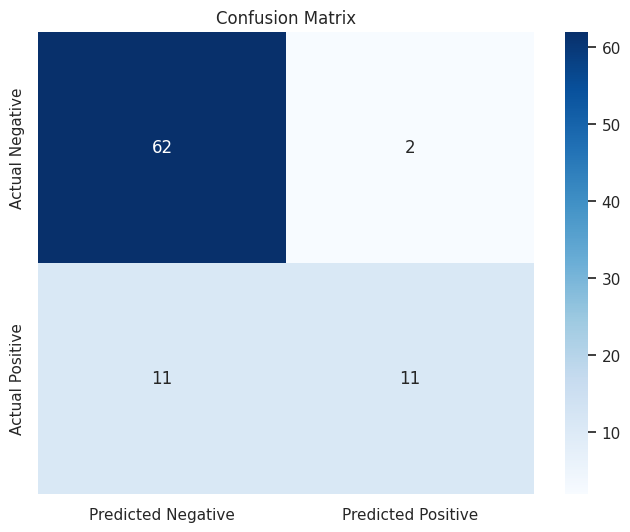

In [87]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on test data
ym2_pred = lr2_male.predict(Xm_test)
ym2_proba = lr2_male.predict_proba(Xm_test)[:, 1]

# Calculate precision, recall, f1-score, and AUC
precision = precision_score(ym_test, ym2_pred)
recall = recall_score(ym_test, ym2_pred)
f1 = f1_score(ym_test, ym2_pred)
auc = roc_auc_score(ym_test, ym2_proba)

print(f"Precision: {precision:.2}")
print(f"Recall: {recall:.2}")
print(f"F1-Score: {f1:.2}")
print(f"AUC: {auc:.2}\n\n")

# Calculate confusion matrix
cm = confusion_matrix(ym_test, ym2_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.show()

In [88]:
lr2_metrics_values = [precision, recall, f1, auc]

Precision: 1.0
Recall: 0.3181818181818182
F1-score: 0.4827586206896552
New Confusion Matrix:




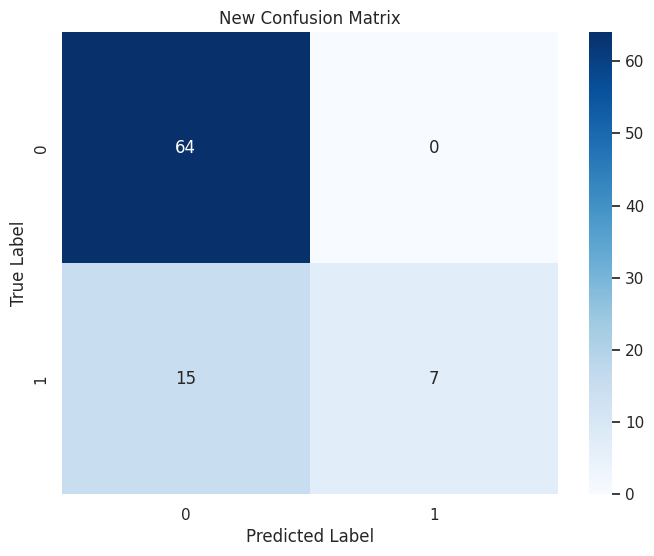

In [89]:
# Adjust the threshold
new_threshold = 0.71

# Apply new threshold to predicted probabilities to get binary predictions
new_y2_pred = (ym2_proba > new_threshold).astype(int)

# Evaluate the model with the new threshold
precision = precision_score(ym_test, new_y2_pred)
recall = recall_score(ym_test, new_y2_pred)
f1 = f1_score(ym_test, new_y2_pred)
new_conf_matrix = confusion_matrix(ym_test, new_y2_pred)

# Print evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("New Confusion Matrix:")
print('\n')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(new_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('New Confusion Matrix')
plt.show()

**Model 2: Random Forest Classifier**


---



In [90]:
from sklearn.ensemble import RandomForestClassifier

rf2_pipeline = Pipeline([
    ('prep', preprocessor),
    ('est', RandomForestClassifier(random_state=42))
])

params = {
    'est__n_estimators': [100, 200, 300],
    'est__max_depth': [1, 2, 5, 10]}

rf2_grid = GridSearchCV(rf2_pipeline, params, cv=5, return_train_score=True)
rf2_grid.fit(Xm_train, ym_train)
print(f"Train Score: {rf2_grid.score(Xm_train, ym_train):.2}")
print(f"Test Score: {rf2_grid.score(Xm_test, ym_test):.2}")

Train Score: 0.9
Test Score: 0.86


In [91]:
rf2_grid.best_params_

{'est__max_depth': 5, 'est__n_estimators': 300}

In [92]:
rf2_m = RandomForestClassifier(random_state=42, n_estimators = 200, max_depth = 5)

rf2_male = Pipeline([
    ('prep', preprocessor),
    ('est', rf2_m)
])

rf2_male.fit(Xm_train, ym_train)
print(f"Train Score: {rf2_male.score(Xm_train, ym_train):.2}")
print(f"Test Score: {rf2_male.score(Xm_test, ym_test):.2}")

Train Score: 0.9
Test Score: 0.86


Precision: 0.81
Recall: 0.59
F1-Score: 0.68
AUC: 0.89



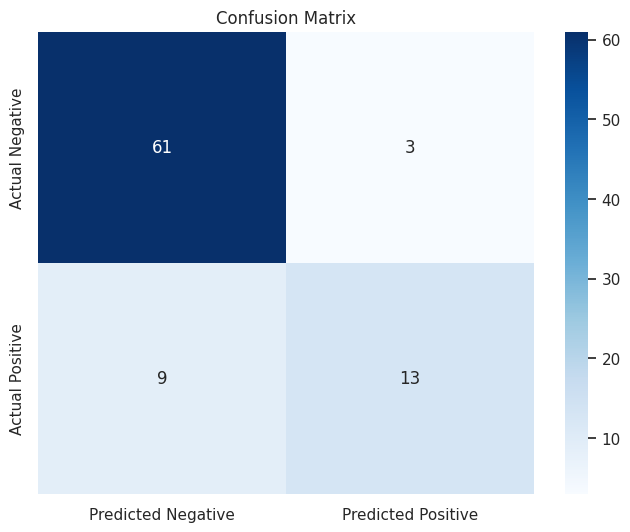

In [93]:
# Make predictions on test data
ym2_pred = rf2_male.predict(Xm_test)
ym2_proba = rf2_male.predict_proba(Xm_test)[:, 1]

# Calculate precision, recall, f1-score, and AUC
precision = precision_score(ym_test, ym2_pred)
recall = recall_score(ym_test, ym2_pred)
f1 = f1_score(ym_test, ym2_pred)
auc = roc_auc_score(ym_test, ym2_proba)

print(f"Precision: {precision:.2}")
print(f"Recall: {recall:.2}")
print(f"F1-Score: {f1:.2}")
print(f"AUC: {auc:.2}\n")

# Calculate confusion matrix
cm = confusion_matrix(ym_test, ym2_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.show()

In [94]:
rfc2_metrics_values = [precision, recall, f1, auc]

Precision: 1.0
Recall: 0.27
F1-Score: 0.43
AUC: 0.89



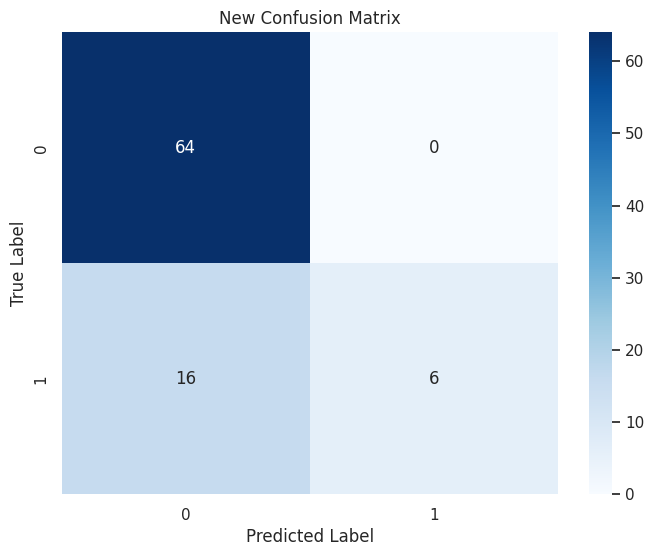

In [95]:
# Adjust the threshold
new_threshold = 0.7

# Apply new threshold to predicted probabilities to get binary predictions
new_y2_pred = (ym2_proba > new_threshold).astype(int)

# Evaluate the model with the new threshold
precision = precision_score(ym_test, new_y2_pred)
recall = recall_score(ym_test, new_y2_pred)
f1 = f1_score(ym_test, new_y2_pred)
new_conf_matrix = confusion_matrix(ym_test, new_y2_pred)

# Print evaluation metrics
print(f"Precision: {precision:.2}")
print(f"Recall: {recall:.2}")
print(f"F1-Score: {f1:.2}")
print(f"AUC: {auc:.2}\n")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(new_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('New Confusion Matrix')
plt.show()

**Model 3: Gradient Boosting**


---



In [96]:
from sklearn.ensemble import GradientBoostingClassifier

gb2_pipeline = Pipeline([
    ('prep', preprocessor),
    ('est', GradientBoostingClassifier(random_state=42))
])

params = {'est__n_estimators': [50, 60, 70, 80, 90, 100, 150, 200],
          'est__learning_rate': [0.01, 0.1, 0.5, 1],
          'est__max_depth': [1, 2, 3, 4, 5]}

gb2_grid = GridSearchCV(gb2_pipeline, params, cv=5, return_train_score=True)
gb2_grid.fit(Xm_train, ym_train)
print(f"Train Score: {gb2_grid.score(Xm_train, ym_train):.2}")
print(f"Test Score: {gb2_grid.score(Xm_test, ym_test):.2}")

Train Score: 0.86
Test Score: 0.88


In [97]:
gb2_grid.best_params_

{'est__learning_rate': 0.01, 'est__max_depth': 2, 'est__n_estimators': 150}

In [98]:
gb2_m = GradientBoostingClassifier(random_state=42, n_estimators = 200, max_depth = 2, learning_rate=0.1)

gb2_male = Pipeline([
    ('prep', preprocessor),
    ('est', gb2_m)
])

gb2_male.fit(Xm_train, ym_train)
print(f"Train Score: {gb2_male.score(Xm_train, ym_train):.2}")
print(f"Test Score: {gb2_male.score(Xm_test, ym_test):.2}")

Train Score: 0.97
Test Score: 0.91


Precision: 0.89
Recall: 0.73
F1-Score: 0.8
AUC: 0.88



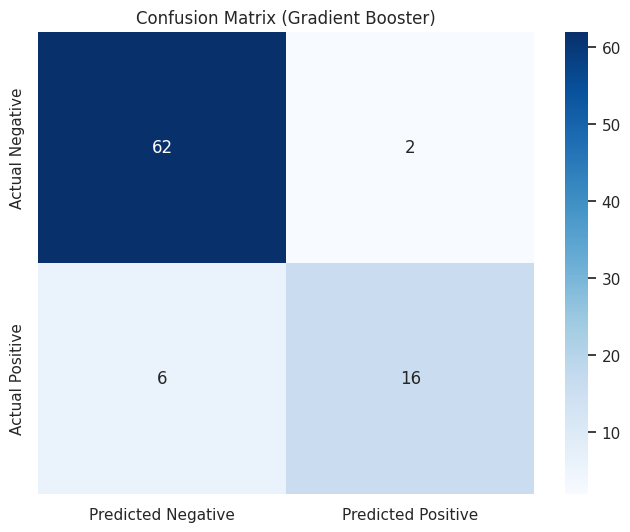

In [99]:
# Make predictions on test data
ym2_pred = gb2_male.predict(Xm_test)
ym2_proba = gb2_male.predict_proba(Xm_test)[:, 1]

# Calculate precision, recall, f1-score, and AUC
precision = precision_score(ym_test, ym2_pred)
recall = recall_score(ym_test, ym2_pred)
f1 = f1_score(ym_test, ym2_pred)
auc = roc_auc_score(ym_test, ym2_proba)

print(f"Precision: {precision:.2}")
print(f"Recall: {recall:.2}")
print(f"F1-Score: {f1:.2}")
print(f"AUC: {auc:.2}\n")

# Calculate confusion matrix
cm = confusion_matrix(ym_test, ym2_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix (Gradient Booster)')
plt.show()

In [100]:
gb2_metrics_values = [precision, recall, f1, auc]

Precision: 1.0
Recall: 0.27
F1-Score: 0.43
AUC: 0.88



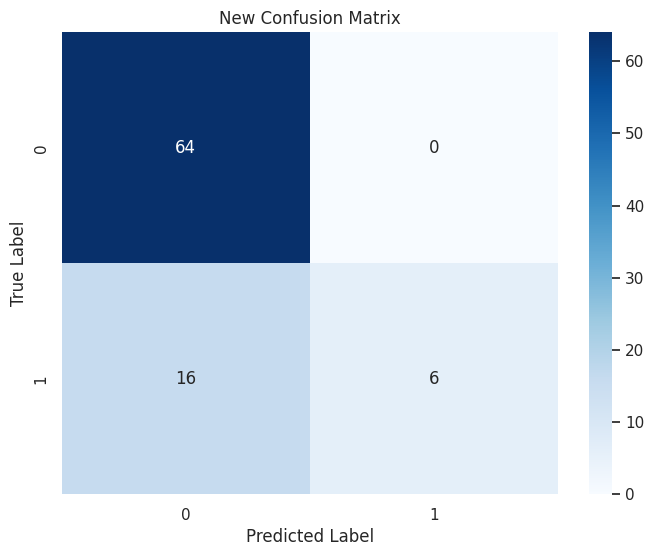

In [101]:
# Adjust the threshold
new_threshold = 0.92

# Apply new threshold to predicted probabilities to get binary predictions
new_y2_pred = (ym2_proba > new_threshold).astype(int)

# Evaluate the model with the new threshold
precision = precision_score(ym_test, new_y2_pred)
recall = recall_score(ym_test, new_y2_pred)
f1 = f1_score(ym_test, new_y2_pred)
new_conf_matrix = confusion_matrix(ym_test, new_y2_pred)

# Print evaluation metrics
print(f"Precision: {precision:.2}")
print(f"Recall: {recall:.2}")
print(f"F1-Score: {f1:.2}")
print(f"AUC: {auc:.2}\n")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(new_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('New Confusion Matrix')
plt.show()

**Feature importance**

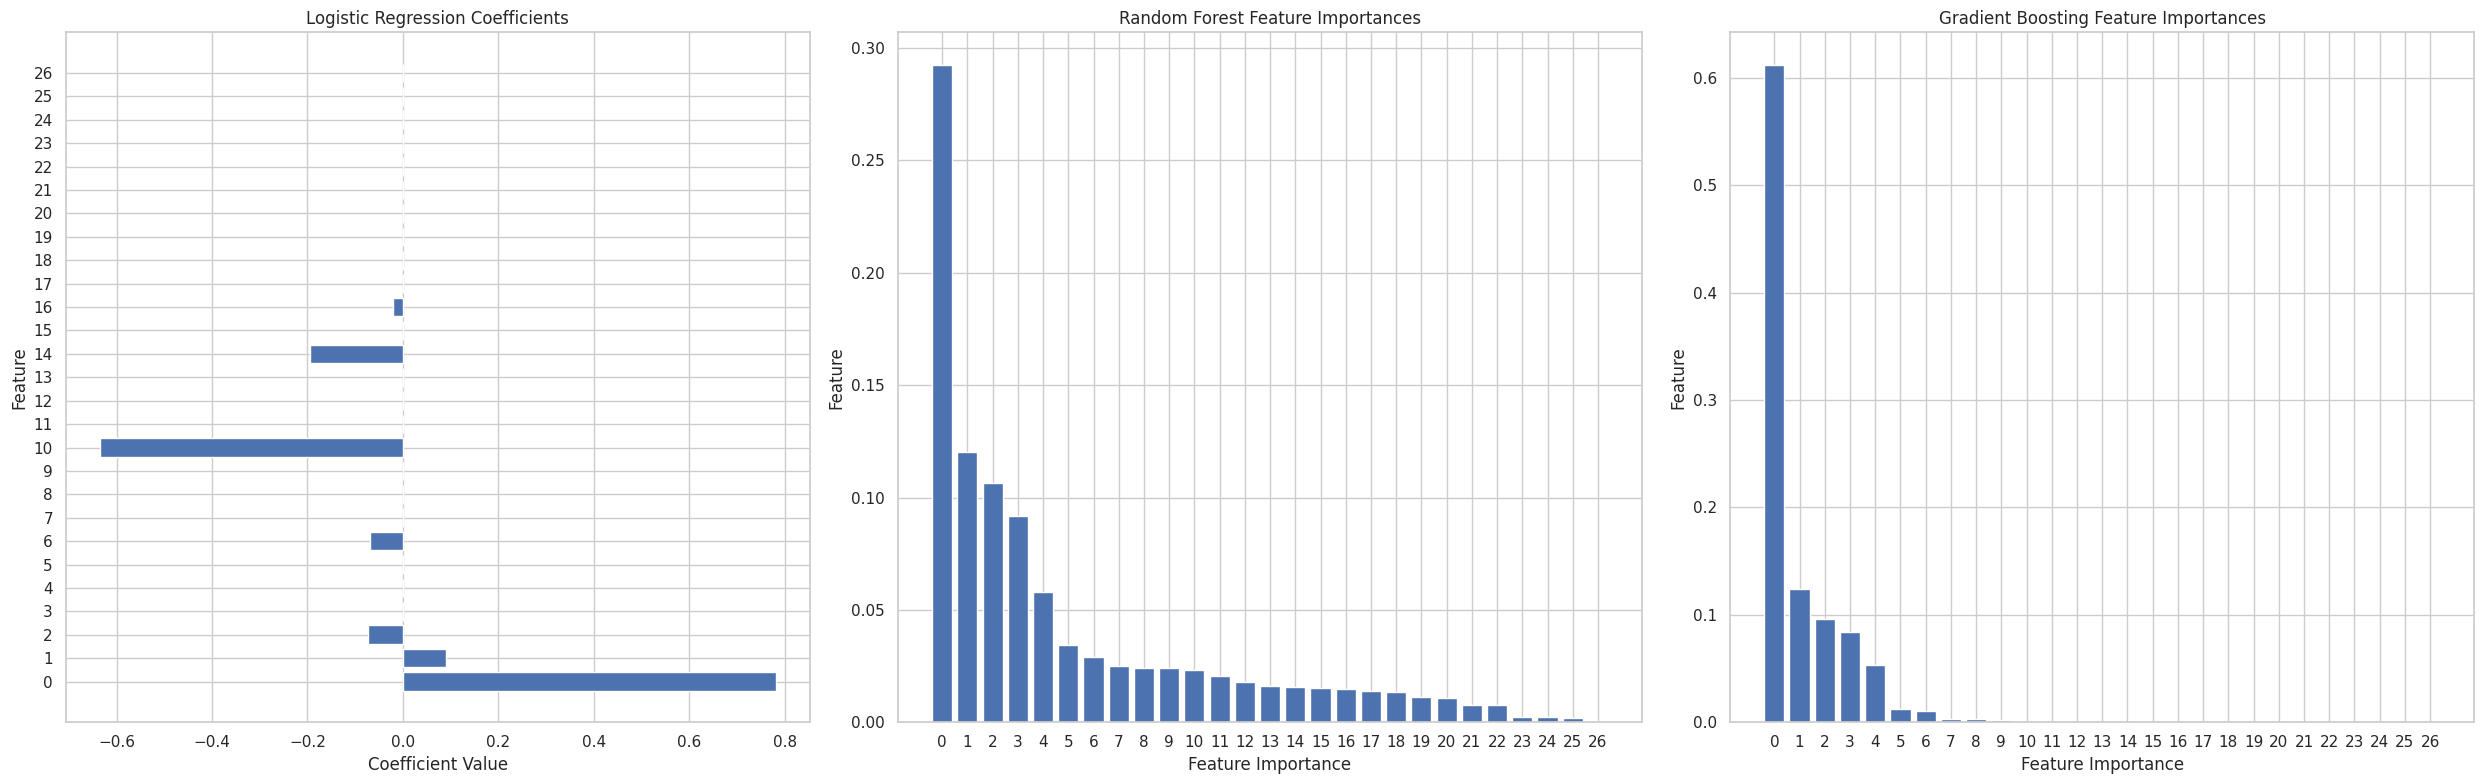

In [102]:
feature_names = lr_male.named_steps['prep'].transformers_[1][1]\
                .named_steps['encoder'].get_feature_names_out()

# Coefficients for logistic regression
lr_coefficients = lr_male.named_steps['est'].coef_[0]

# Feature importances for RFC
rf_importances = rf_male.named_steps['est'].feature_importances_
rf_indices = rf_importances.argsort()[::-1]

# Feature importances for Gradient Boosting
gb_importances = gb_male.named_steps['est'].feature_importances_
gb_indices = gb_importances.argsort()[::-1]


fig, axes = plt.subplots(1, 3, figsize=(25, 8))

# Logistic regression
axes[0].barh(range(len(lr_coefficients)), lr_coefficients, align="center")
axes[0].set_title("Logistic Regression Coefficients")
axes[0].set_yticks(range(len(lr_coefficients)))
# axes[0].set_yticklabels(feature_names)
axes[0].set_xlabel("Coefficient Value")
axes[0].set_ylabel("Feature")

# Random forest
axes[1].bar(range(len(rf_importances)), rf_importances[rf_indices], align="center")
axes[1].set_title("Random Forest Feature Importances")
axes[1].set_xticks(range(len(rf_importances)))
# axes[1].set_xticklabels(feature_names[rf_indices], rotation=90)
axes[1].set_xlabel("Feature Importance")
axes[1].set_ylabel("Feature")

# Gradient boosting
axes[2].bar(range(len(gb_importances)), gb_importances[gb_indices], align="center")
axes[2].set_title("Gradient Boosting Feature Importances")
axes[2].set_xticks(range(len(gb_importances)))
# axes[2].set_xticklabels(feature_names[gb_indices], rotation=90)
axes[2].set_xlabel("Feature Importance")
axes[2].set_ylabel("Feature")


plt.tight_layout()
plt.show()

**Model 2 Performance Comparison**


---



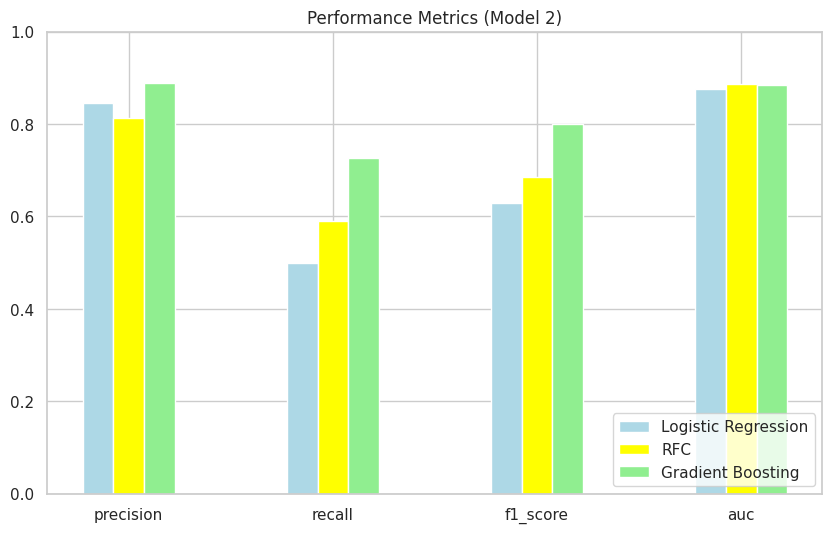

In [103]:
# Plotting the evaluation results
metrics_names = ['precision', 'recall', 'f1_score', 'auc']

x = np.arange(len(metrics_names))
bar_width = 0.15

plt.figure(figsize=(10, 6))

# Logistic Regressor
plt.bar(x - bar_width, lr2_metrics_values, width=bar_width, color='lightblue', label='Logistic Regression')

# Random Forest Classifier
plt.bar(x, rfc2_metrics_values, width=bar_width, color='yellow', label='RFC')

# Gradient Booster
plt.bar(x + bar_width, gb2_metrics_values, width=bar_width, color='lightgreen', label='Gradient Boosting')


plt.xticks(x, metrics_names)
plt.title('Performance Metrics (Model 2)')
plt.ylim(0.0, 1.0)
plt.legend(loc='lower right')
plt.show()

# Diagnosis Level 3 - Male

Additional data: Low grip strength, Grip Strength

In [104]:
data_male.shape

(343, 20)

In [105]:
Xm = data_male.drop(['SARCOPENIA', 'Gender'], axis = 1)

In [106]:
ym = data_male.SARCOPENIA

In [107]:
Xm.shape, ym.shape

((343, 18), (343,))

In [108]:
Xm.head()

Age  Weight   Height     Hip Smoking   Smoking (packet/year)   Alcohol  \
5    57     98.0    179.0  100.0     1.0                      30    social   
9    76     70.0    168.0  109.0     0.0                       0         0   
12   71    108.0    164.0  121.0     1.0                      25         0   
16   51     82.0    178.0  103.0     1.0                      35    social   
23   72     64.0    163.0  100.0     0.0                       0         0   

   DM  ASTIM HT       Education Working Status  Exercise LowCST   CST  \
5    0   0.0  1     high school        retired  1-2/week    0.0   8.0   
9    1   NaN  1      university        retired  3-4/week    NaN  10.0   
12   1   0.0  1  primary school        working         0    1.0  12.9   
16   0   0.0  0     high school     unemployed         0    0.0   7.0   
23   0   0.0  0  primary school        retired         0    0.0  10.3   

    Gait speed Low grip strength  Grip strength  
5         0.83               0.0           42.0  
9         1.20               NaN           25.0  
12        0.83               0.0           38.0  
16        1.07               0.0           38.0  
23        0.92               1.0           24.0

In [109]:
ym.head()

5     0.0
9     1.0
12    1.0
16    0.0
23    0.0
Name: SARCOPENIA, dtype: float64

In [110]:
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm,ym, random_state=0, stratify=ym)

In [111]:
categorical = Xm_train.dtypes == object
numerical = Xm_train.dtypes != object

In [112]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical),
        ('cat', categorical_pipeline, categorical)
    ])

**Model 1: Logistic Regression**


---



In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


lr3_pipeline = Pipeline([
    ('prep', preprocessor),
    ('est', LogisticRegression(solver='liblinear', random_state=42, max_iter=10000, penalty='l1'))
])

params = {
    'est__C': [0.1, 0.2, 0.3, 0.5, 1.0, 10]}

lr3_grid = GridSearchCV(lr3_pipeline, params, cv=5, return_train_score=True)
lr3_grid.fit(Xm_train, ym_train)
print(f"Train Score: {lr3_grid.score(Xm_train, ym_train):.2}")
print(f"Test Score: {lr3_grid.score(Xm_test, ym_test):.2}")

Train Score: 0.85
Test Score: 0.79


In [114]:
lr3_grid.best_params_

{'est__C': 0.5}

In [115]:
lr3_m = LogisticRegression(solver='liblinear', random_state=42, max_iter=10000, penalty='l1', C=0.5)

lr3_male = Pipeline([
    ('prep', preprocessor),
    ('est', lr3_m)
])

lr3_male.fit(Xm_train, ym_train)
print(f"Train Score: {lr3_male.score(Xm_train, ym_train):.2}")
print(f"Test Score: {lr3_male.score(Xm_test, ym_test):.2}")

Train Score: 0.85
Test Score: 0.79


Precision: 0.59
Recall: 0.59
F1-Score: 0.59
AUC: 0.85




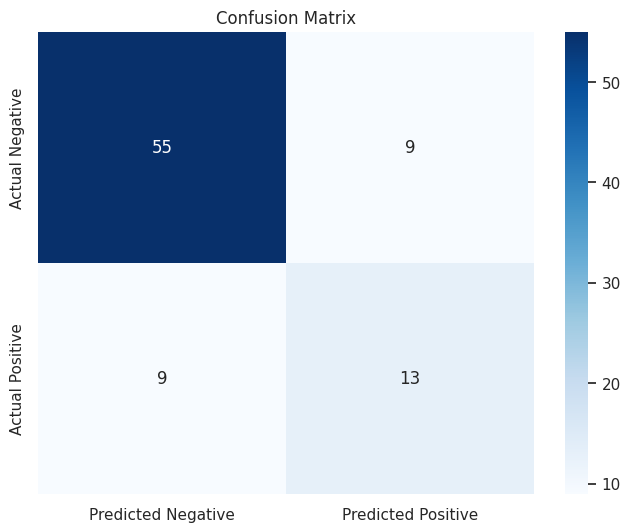

In [116]:
# Make predictions on test data
ym3_pred = lr3_male.predict(Xm_test)
ym3_proba = lr3_male.predict_proba(Xm_test)[:, 1]

# Calculate precision, recall, f1-score, and AUC
precision = precision_score(ym_test, ym3_pred)
recall = recall_score(ym_test, ym3_pred)
f1 = f1_score(ym_test, ym3_pred)
auc = roc_auc_score(ym_test, ym3_proba)

print(f"Precision: {precision:.2}")
print(f"Recall: {recall:.2}")
print(f"F1-Score: {f1:.2}")
print(f"AUC: {auc:.2}\n\n")

# Calculate confusion matrix
cm = confusion_matrix(ym_test, ym3_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.show()

In [117]:
lr3_metrics_values = [precision, recall, f1, auc]

Precision: 1.0
Recall: 0.13636363636363635
F1-score: 0.24
New Confusion Matrix:




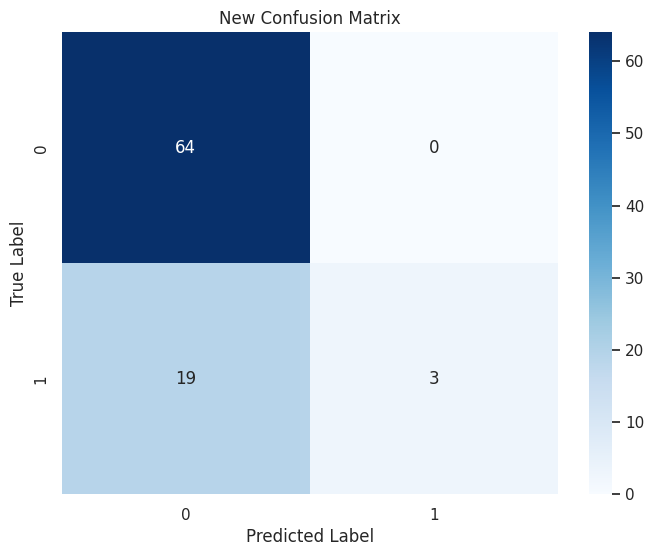

In [118]:
# Adjust the threshold
new_threshold = 0.9

# Apply new threshold to predicted probabilities to get binary predictions
new_y3_pred = (ym3_proba > new_threshold).astype(int)

# Evaluate the model with the new threshold
precision = precision_score(ym_test, new_y3_pred)
recall = recall_score(ym_test, new_y3_pred)
f1 = f1_score(ym_test, new_y3_pred)
new_conf_matrix = confusion_matrix(ym_test, new_y3_pred)

# Print evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("New Confusion Matrix:")
print('\n')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(new_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('New Confusion Matrix')
plt.show()

**Model 2: Random Forest Classifier**


---



In [119]:
rf3_pipeline = Pipeline([
    ('prep', preprocessor),
    ('est', RandomForestClassifier(random_state=42))
])

params = {
    'est__n_estimators': [100, 200, 300],
    'est__max_depth': [1, 2, 5, 10]}

rf3_grid = GridSearchCV(rf3_pipeline, params, cv=5, return_train_score=True)
rf3_grid.fit(Xm_train, ym_train)
print(f"Train Score: {rf3_grid.score(Xm_train, ym_train):.2}")
print(f"Test Score: {rf3_grid.score(Xm_test, ym_test):.2}")

Train Score: 1.0
Test Score: 0.79


In [120]:
rf3_grid.best_params_

{'est__max_depth': 10, 'est__n_estimators': 200}

In [121]:
rf3_m = RandomForestClassifier(random_state=42, n_estimators = 200, max_depth = 2)

rf3_male = Pipeline([
    ('prep', preprocessor),
    ('est', rf3_m)
])

rf3_male.fit(Xm_train, ym_train)
print(f"Train Score: {rf3_male.score(Xm_train, ym_train):.2}")
print(f"Test Score: {rf3_male.score(Xm_test, ym_test):.2}")

Train Score: 0.84
Test Score: 0.78


Precision: 0.67
Recall: 0.27
F1-Score: 0.39
AUC: 0.89



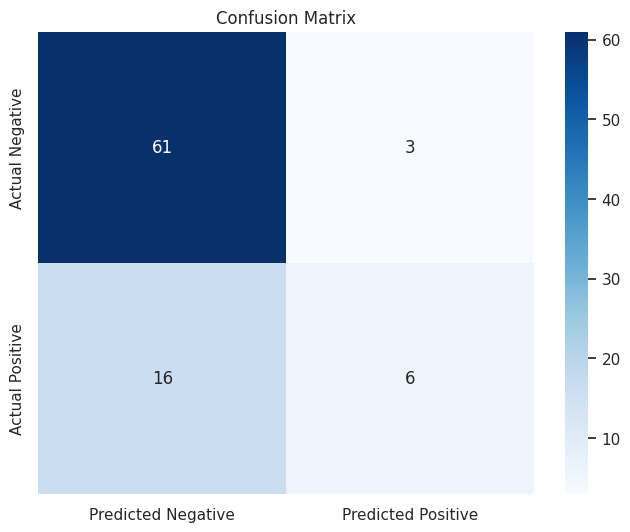

In [122]:
# Make predictions on test data
ym3_pred = rf3_male.predict(Xm_test)
ym3_proba = rf3_male.predict_proba(Xm_test)[:, 1]

# Calculate precision, recall, f1-score, and AUC
precision = precision_score(ym_test, ym3_pred)
recall = recall_score(ym_test, ym3_pred)
f1 = f1_score(ym_test, ym3_pred)
auc = roc_auc_score(ym_test, ym3_proba)

print(f"Precision: {precision:.2}")
print(f"Recall: {recall:.2}")
print(f"F1-Score: {f1:.2}")
print(f"AUC: {auc:.2}\n")

# Calculate confusion matrix
cm = confusion_matrix(ym_test, ym3_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.show()

In [123]:
rfc3_metrics_values = [precision, recall, f1, auc]

Precision: 1.0
Recall: 0.091
F1-Score: 0.17
AUC: 0.89



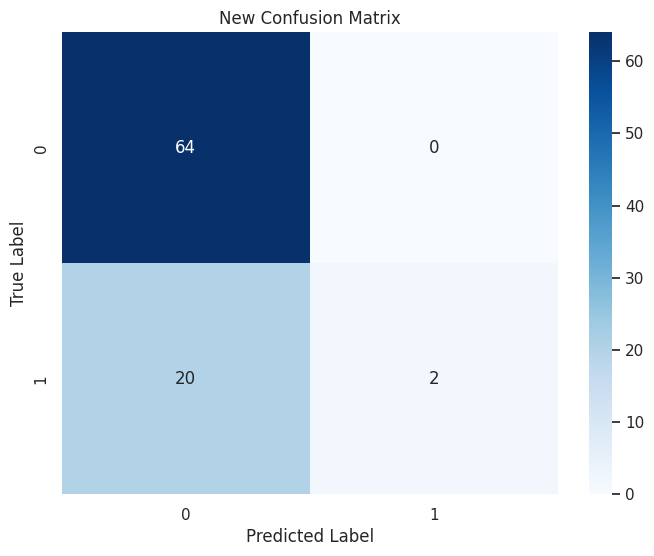

In [124]:
# Adjust the threshold
new_threshold = 0.64

# Apply new threshold to predicted probabilities to get binary predictions
new_y3_pred = (ym3_proba > new_threshold).astype(int)

# Evaluate the model with the new threshold
precision = precision_score(ym_test, new_y3_pred)
recall = recall_score(ym_test, new_y3_pred)
f1 = f1_score(ym_test, new_y3_pred)
new_conf_matrix = confusion_matrix(ym_test, new_y3_pred)

# Print evaluation metrics
print(f"Precision: {precision:.2}")
print(f"Recall: {recall:.2}")
print(f"F1-Score: {f1:.2}")
print(f"AUC: {auc:.2}\n")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(new_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('New Confusion Matrix')
plt.show()

**Model 3: Gradient Boosting**


---



In [125]:
from sklearn.ensemble import GradientBoostingClassifier

gb3_pipeline = Pipeline([
    ('prep', preprocessor),
    ('est', GradientBoostingClassifier(random_state=42))
])

params = {'est__n_estimators': [50, 60, 70, 80, 90, 100, 150, 200],
          'est__learning_rate': [0.01, 0.1, 0.5, 1],
          'est__max_depth': [1, 2, 3, 4, 5]}

gb3_grid = GridSearchCV(gb3_pipeline, params, cv=5, return_train_score=True)
gb3_grid.fit(Xm_train, ym_train)
print(f"Train Score: {gb3_grid.score(Xm_train, ym_train):.2}")
print(f"Test Score: {gb3_grid.score(Xm_test, ym_test):.2}")

Train Score: 1.0
Test Score: 0.86


In [126]:
gb3_grid.best_params_

{'est__learning_rate': 0.5, 'est__max_depth': 3, 'est__n_estimators': 50}

In [127]:
gb3_m = GradientBoostingClassifier(random_state=42, n_estimators = 100, max_depth = 1, learning_rate=0.2)

gb3_male = Pipeline([
    ('prep', preprocessor),
    ('est', gb3_m)
])

gb3_male.fit(Xm_train, ym_train)
print(f"Train Score: {gb3_male.score(Xm_train, ym_train):.2}")
print(f"Test Score: {gb3_male.score(Xm_test, ym_test):.2}")

Train Score: 0.91
Test Score: 0.81


Precision: 0.67
Recall: 0.55
F1-Score: 0.6
AUC: 0.88



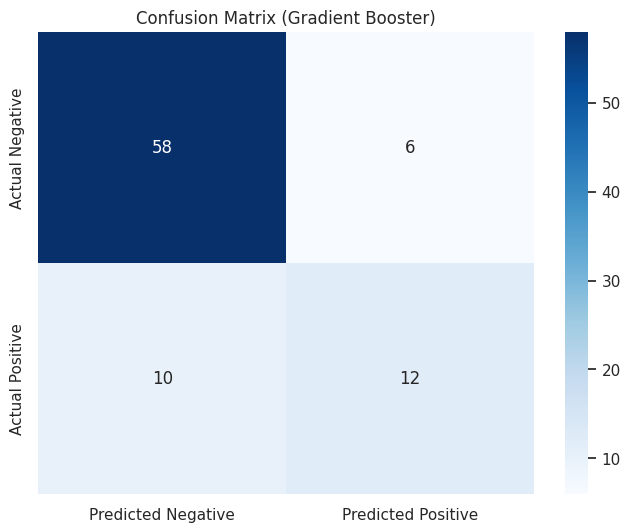

In [128]:
# Make predictions on test data
ym3_pred = gb3_male.predict(Xm_test)
ym3_proba = gb3_male.predict_proba(Xm_test)[:, 1]

# Calculate precision, recall, f1-score, and AUC
precision = precision_score(ym_test, ym3_pred)
recall = recall_score(ym_test, ym3_pred)
f1 = f1_score(ym_test, ym3_pred)
auc = roc_auc_score(ym_test, ym3_proba)

print(f"Precision: {precision:.2}")
print(f"Recall: {recall:.2}")
print(f"F1-Score: {f1:.2}")
print(f"AUC: {auc:.2}\n")

# Calculate confusion matrix
cm = confusion_matrix(ym_test, ym3_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix (Gradient Booster)')
plt.show()

In [129]:
gb3_metrics_values = [precision, recall, f1, auc]

In [130]:
import joblib

joblib.dump(gb3_male, 'model3_male.joblib')

['model3_male.joblib']

Precision: 1.0
Recall: 0.091
F1-Score: 0.17
AUC: 0.88



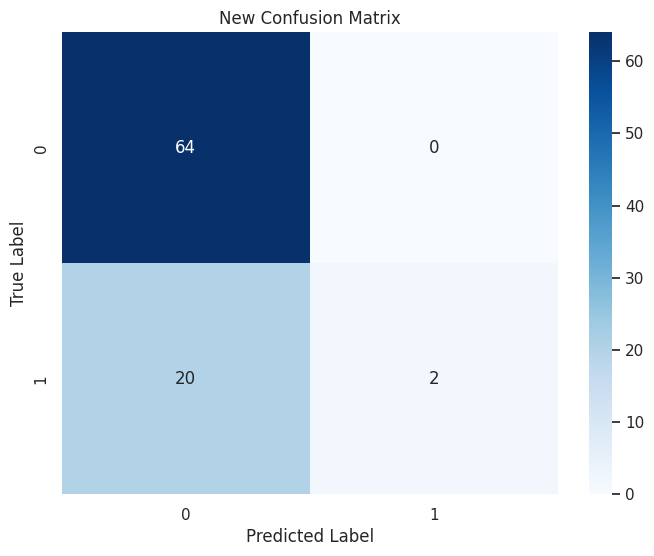

In [131]:
# Adjust the threshold
new_threshold = 0.98

# Apply new threshold to predicted probabilities to get binary predictions
new_y3_pred = (ym3_proba > new_threshold).astype(int)

# Evaluate the model with the new threshold
precision = precision_score(ym_test, new_y3_pred)
recall = recall_score(ym_test, new_y3_pred)
f1 = f1_score(ym_test, new_y3_pred)
new_conf_matrix = confusion_matrix(ym_test, new_y3_pred)

# Print evaluation metrics
print(f"Precision: {precision:.2}")
print(f"Recall: {recall:.2}")
print(f"F1-Score: {f1:.2}")
print(f"AUC: {auc:.2}\n")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(new_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('New Confusion Matrix')
plt.show()

**Model 3 Performance Comparison**


---



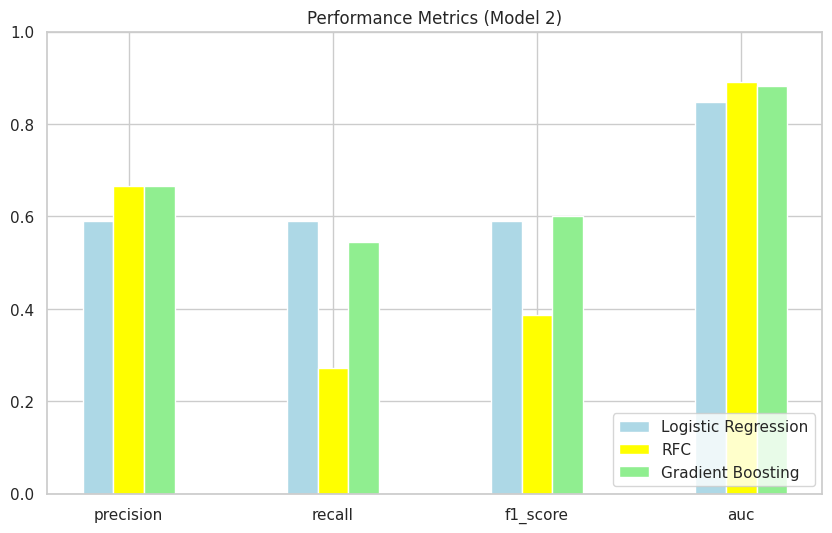

In [132]:
# Plotting the evaluation results
metrics_names = ['precision', 'recall', 'f1_score', 'auc']

x = np.arange(len(metrics_names))
bar_width = 0.15

plt.figure(figsize=(10, 6))

# Logistic Regressor
plt.bar(x - bar_width, lr3_metrics_values, width=bar_width, color='lightblue', label='Logistic Regression')

# Random Forest Classifier
plt.bar(x, rfc3_metrics_values, width=bar_width, color='yellow', label='RFC')

# Gradient Booster
plt.bar(x + bar_width, gb3_metrics_values, width=bar_width, color='lightgreen', label='Gradient Boosting')


plt.xticks(x, metrics_names)
plt.title('Performance Metrics (Model 2)')
plt.ylim(0.0, 1.0)
plt.legend(loc='lower right')
plt.show()

# Diagnosis Level 1 - Female

In [133]:
data_female.shape

(843, 20)

In [134]:
Xf = data_female.drop(['SARCOPENIA', 'CST', 'Gait speed', 'LowCST', 'Low grip strength', 'Grip strength', 'Gender'], axis = 1)

In [135]:
yf = data_female.SARCOPENIA

In [136]:
Xf.shape, yf.shape

((843, 13), (843,))

In [137]:
Xf.head()

Age  Weight   Height     Hip Smoking   Smoking (packet/year)   Alcohol DM   \
0   64     66.0    155.0  104.0     0.0                       0         0   0   
1   53     55.0    150.0   97.0     0.0                       0         0   0   
2   56     56.0    150.0  125.0     0.0                       0         0   0   
3   58     75.0    160.0    NaN     0.0                       0         0   1   
4   55     72.0    157.0  104.0     1.0                       4         0   0   

  ASTIM HT    Education Working Status  Exercise  
0   0.0  0  high school        retired         0  
1   0.0  0          NaN            NaN       NaN  
2   0.0  1   illiterate        retired         0  
3   0.0  1   illiterate     unemployed         0  
4   NaN  0        other     unemployed  1-2/week

In [138]:
yf.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: SARCOPENIA, dtype: float64

In [139]:
yf.isnull().sum()

0

In [140]:
Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf,yf, random_state=0, stratify=yf)

In [141]:
categorical = Xf_train.dtypes == object
numerical = Xf_train.dtypes != object

In [142]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical),
        ('cat', categorical_pipeline, categorical)
    ])

**Model 1: Logistic Regression**


---



In [143]:
from sklearn.model_selection import GridSearchCV

lrf_pipeline = Pipeline([
    ('prep', preprocessor),
    ('est', LogisticRegression(solver='liblinear', random_state=42, max_iter=10000, penalty='l1'))
])

params = {
    'est__C': [0.1, 0.2, 0.3, 0.5, 1.0, 10]}

lrf_grid = GridSearchCV(lrf_pipeline, params, cv=5, return_train_score=True)
lrf_grid.fit(Xf_train, yf_train)
print(f"Train Score: {lrf_grid.score(Xf_train, yf_train):.2}")
print(f"Test Score: {lrf_grid.score(Xf_test, yf_test):.2}")

Train Score: 0.84
Test Score: 0.84


In [144]:
lrf_grid.best_params_

{'est__C': 0.5}

In [145]:
lr_f = LogisticRegression(solver='liblinear', random_state=42, max_iter=10000, penalty='l1', C=0.1)

lr_female = Pipeline([
    ('prep', preprocessor),
    ('est', lr_f)
])

lr_female.fit(Xf_train, yf_train)
print(f"Train Score: {lr_female.score(Xf_train, yf_train):.2}")
print(f"Test Score: {lr_female.score(Xf_test, yf_test):.2}")

Train Score: 0.84
Test Score: 0.85


Precision: 1.0
Recall: 0.059
F1-Score: 0.11
AUC: 0.7




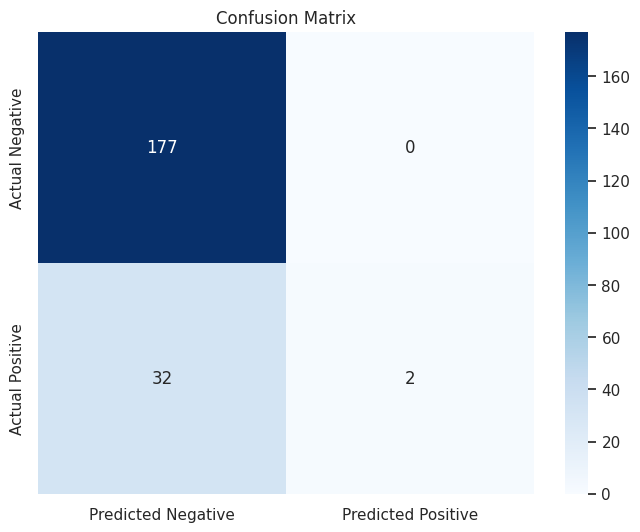

In [146]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on test data
yf_pred = lr_female.predict(Xf_test)
yf_proba = lr_female.predict_proba(Xf_test)[:, 1]

# Calculate precision, recall, f1-score, and AUC
precision = precision_score(yf_test, yf_pred)
recall = recall_score(yf_test, yf_pred)
f1 = f1_score(yf_test, yf_pred)
auc = roc_auc_score(yf_test, yf_proba)

print(f"Precision: {precision:.2}")
print(f"Recall: {recall:.2}")
print(f"F1-Score: {f1:.2}")
print(f"AUC: {auc:.2}\n\n")

# Calculate confusion matrix
cm = confusion_matrix(yf_test, yf_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.show()

In [147]:
lrf_metrics_values = [precision, recall, f1, auc]

Precision: 1.0
Recall: 0.059
F1-score: 0.11
New Confusion Matrix:




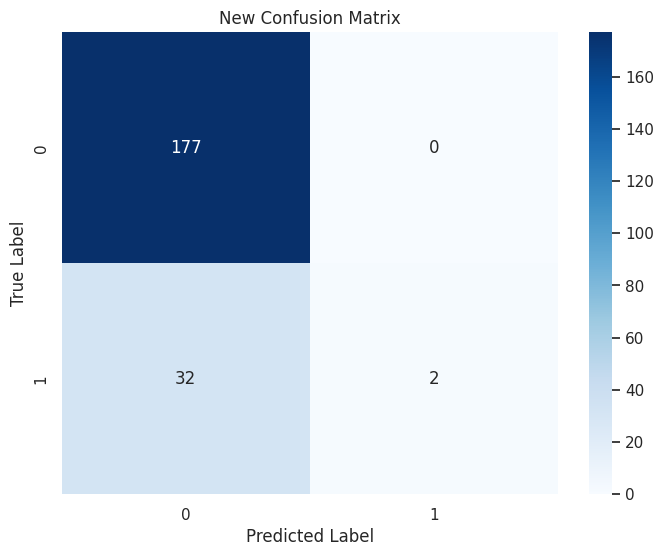

In [148]:
# Adjust the threshold
new_threshold = 0.50

# Apply new threshold to predicted probabilities to get binary predictions
new_y_pred = (yf_proba > new_threshold).astype(int)

# Evaluate the model with the new threshold
precision = precision_score(yf_test, new_y_pred)
recall = recall_score(yf_test, new_y_pred)
f1 = f1_score(yf_test, new_y_pred)
new_conf_matrix = confusion_matrix(yf_test, new_y_pred)

# Print evaluation metrics
print("Precision:", f'{precision:.2}')
print("Recall:", f'{recall:.2}')
print("F1-score:", f'{f1:.2}')
print("New Confusion Matrix:")
print('\n')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(new_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('New Confusion Matrix')
plt.show()

**Model 2: Random Forest Classifier**


---



In [149]:
from sklearn.ensemble import RandomForestClassifier

rff_pipeline = Pipeline([
    ('prep', preprocessor),
    ('est', RandomForestClassifier(random_state=42))
])

params = {
    'est__n_estimators': [100, 200, 300],
    'est__max_depth': [1, 2, 5, 10]}

rff_grid = GridSearchCV(rff_pipeline, params, cv=5, return_train_score=True)
rff_grid.fit(Xf_train, yf_train)
print(f"Train Score: {rff_grid.score(Xf_train, yf_train):.2}")
print(f"Test Score: {rff_grid.score(Xf_test, yf_test):.2}")

Train Score: 0.84
Test Score: 0.84


In [150]:
rff_grid.best_params_

{'est__max_depth': 1, 'est__n_estimators': 100}

In [151]:
rff = RandomForestClassifier(random_state=42, n_estimators = 100, max_depth = 10)

rf_female = Pipeline([
    ('prep', preprocessor),
    ('est', rff)
])

rf_female.fit(Xf_train, yf_train)
print(f"Train Score: {rf_female.score(Xf_train, yf_train):.2}")
print(f"Test Score: {rf_female.score(Xf_test, yf_test):.2}")

Train Score: 0.96
Test Score: 0.84


Precision: 0.6
Recall: 0.088
F1-Score: 0.15
AUC: 0.69



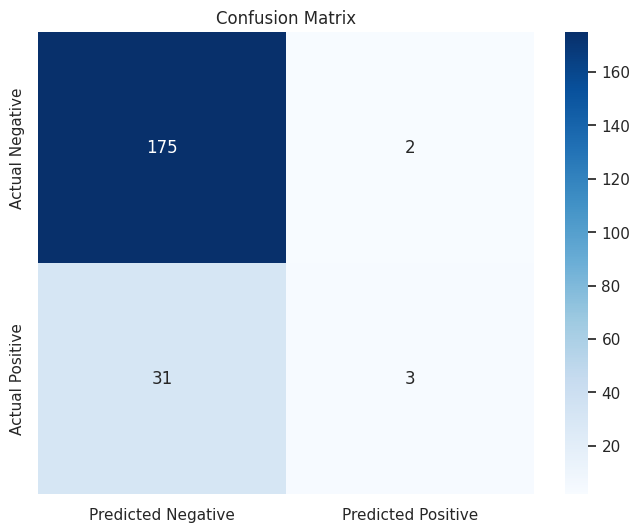

In [152]:
# Make predictions on test data
yf_pred = rf_female.predict(Xf_test)
yf_proba = rf_female.predict_proba(Xf_test)[:, 1]

# Calculate precision, recall, f1-score, and AUC
precision = precision_score(yf_test, yf_pred)
recall = recall_score(yf_test, yf_pred)
f1 = f1_score(yf_test, yf_pred)
auc = roc_auc_score(yf_test, yf_proba)

print(f"Precision: {precision:.2}")
print(f"Recall: {recall:.2}")
print(f"F1-Score: {f1:.2}")
print(f"AUC: {auc:.2}\n")

# Calculate confusion matrix
cm = confusion_matrix(yf_test, yf_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.show()

In [153]:
rff_metrics_values = [precision, recall, f1, auc]

Precision: 0.6
Recall: 0.088
F1-score: 0.15
New Confusion Matrix:




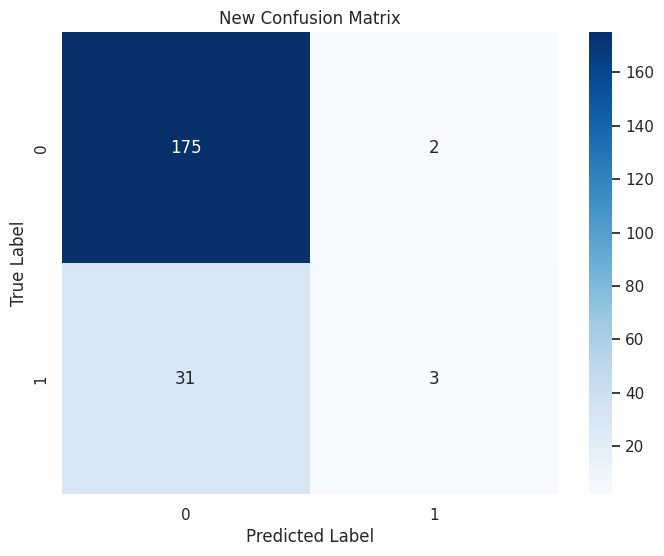

In [154]:
# Adjust the threshold
new_threshold = 0.5

# Apply new threshold to predicted probabilities to get binary predictions
new_y_pred = (yf_proba > new_threshold).astype(int)

# Evaluate the model with the new threshold
precision = precision_score(yf_test, new_y_pred)
recall = recall_score(yf_test, new_y_pred)
f1 = f1_score(yf_test, new_y_pred)
new_conf_matrix = confusion_matrix(yf_test, new_y_pred)

# Print evaluation metrics
print("Precision:", f'{precision:.2}')
print("Recall:", f'{recall:.2}')
print("F1-score:", f'{f1:.2}')
print("New Confusion Matrix:")
print('\n')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(new_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('New Confusion Matrix')
plt.show()

**Model 3: Gradient Boosting**


---



In [155]:
from sklearn.ensemble import GradientBoostingClassifier

gbf_pipeline = Pipeline([
    ('prep', preprocessor),
    ('est', GradientBoostingClassifier(random_state=42))
])

params = {'est__n_estimators': [50, 60, 70, 80, 90, 100, 150, 200],
          'est__learning_rate': [0.01, 0.1, 0.5, 1],
          'est__max_depth': [1, 2, 3, 4, 5]}

gbf_grid = GridSearchCV(gbf_pipeline, params, cv=5, return_train_score=True)
gbf_grid.fit(Xf_train, yf_train)
print(f"Train Score: {gbf_grid.score(Xf_train, yf_train):.2}")
print(f"Test Score: {gbf_grid.score(Xf_test, yf_test):.2}")

Train Score: 0.84
Test Score: 0.84


In [156]:
gbf_grid.best_params_

{'est__learning_rate': 0.01, 'est__max_depth': 4, 'est__n_estimators': 50}

In [157]:
gb_f = GradientBoostingClassifier(random_state=42, n_estimators = 100, max_depth = 2, learning_rate=0.1)

gb_female = Pipeline([
    ('prep', preprocessor),
    ('est', gb_f)
])

gb_female.fit(Xf_train, yf_train)
print(f"Train Score: {gb_female.score(Xf_train, yf_train):.2}")
print(f"Test Score: {gb_female.score(Xf_test, yf_test):.2}")

Train Score: 0.88
Test Score: 0.83


Precision: 0.43
Recall: 0.18
F1-Score: 0.25
AUC: 0.71



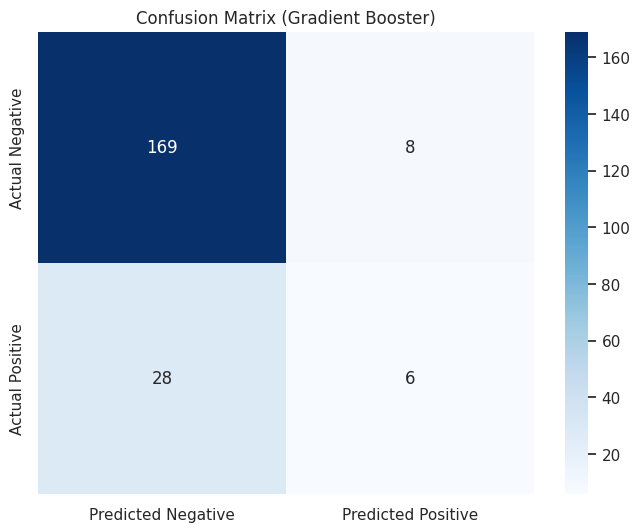

In [158]:
# Make predictions on test data
yf_pred = gb_female.predict(Xf_test)
yf_proba = gb_female.predict_proba(Xf_test)[:, 1]

# Calculate precision, recall, f1-score, and AUC
precision = precision_score(yf_test, yf_pred)
recall = recall_score(yf_test, yf_pred)
f1 = f1_score(yf_test, yf_pred)
auc = roc_auc_score(yf_test, yf_proba)

print(f"Precision: {precision:.2}")
print(f"Recall: {recall:.2}")
print(f"F1-Score: {f1:.2}")
print(f"AUC: {auc:.2}\n")

# Calculate confusion matrix
cm = confusion_matrix(yf_test, yf_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix (Gradient Booster)')
plt.show()

In [159]:
gbf_metrics_values = [precision, recall, f1, auc]

Precision: 1.0
Recall: 0.029
F1-score: 0.057
New Confusion Matrix:




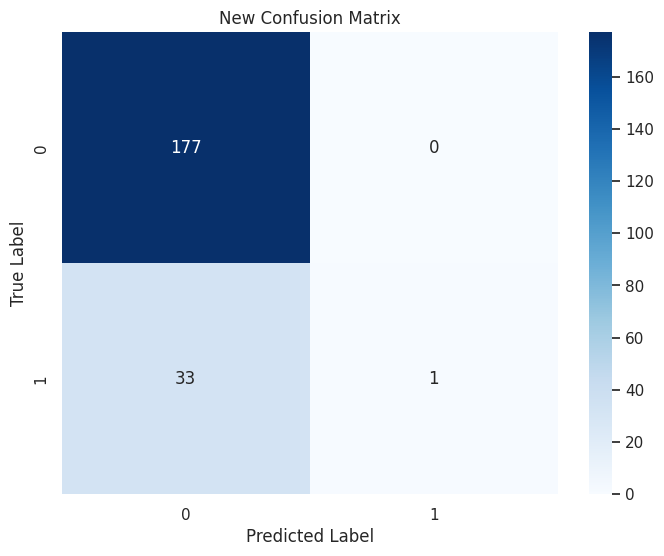

In [160]:
# Adjust the threshold
new_threshold = 0.70

# Apply new threshold to predicted probabilities to get binary predictions
new_y_pred = (yf_proba > new_threshold).astype(int)

# Evaluate the model with the new threshold
precision = precision_score(yf_test, new_y_pred)
recall = recall_score(yf_test, new_y_pred)
f1 = f1_score(yf_test, new_y_pred)
new_conf_matrix = confusion_matrix(yf_test, new_y_pred)

# Print evaluation metrics
print("Precision:", f'{precision:.2}')
print("Recall:", f'{recall:.2}')
print("F1-score:", f'{f1:.2}')
print("New Confusion Matrix:")
print('\n')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(new_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('New Confusion Matrix')
plt.show()

**Model Performance Comparison**


---



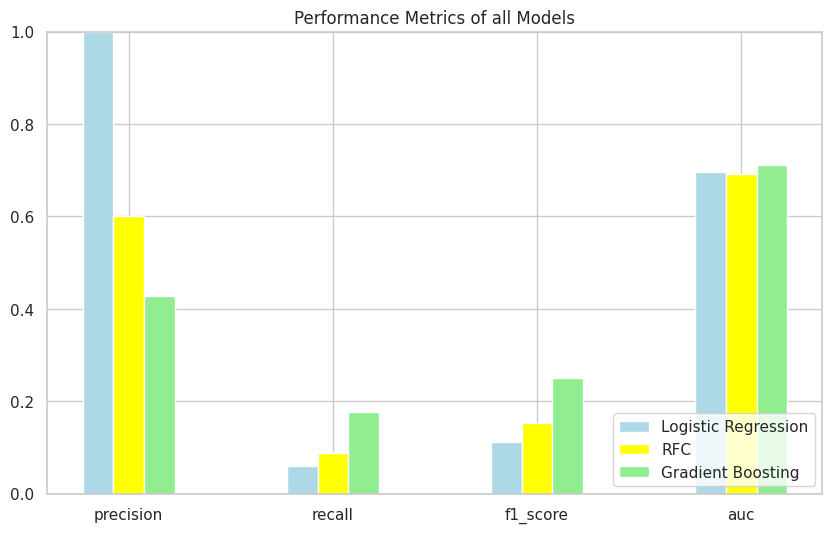

In [161]:
# Plotting the evaluation results
metrics_names = ['precision', 'recall', 'f1_score', 'auc']

x = np.arange(len(metrics_names))
bar_width = 0.15

plt.figure(figsize=(10, 6))

# Logistic Regressor
plt.bar(x - bar_width, lrf_metrics_values, width=bar_width, color='lightblue', label='Logistic Regression')

# Random Forest Classifier
plt.bar(x, rff_metrics_values, width=bar_width, color='yellow', label='RFC')

# Gradient Booster
plt.bar(x + bar_width, gbf_metrics_values, width=bar_width, color='lightgreen', label='Gradient Boosting')


plt.xticks(x, metrics_names)
plt.title('Performance Metrics of all Models')
plt.ylim(0.0, 1.0)
plt.legend(loc='lower right')
plt.show()

# Diagnosis Level 2 - Female

In [162]:
data_female.shape

(843, 20)

In [163]:
Xf = data_female.drop(['SARCOPENIA', 'Low grip strength', 'Grip strength', 'Gender'], axis = 1)

In [164]:
yf = data_female.SARCOPENIA

In [165]:
Xf.shape, yf.shape

((843, 16), (843,))

In [166]:
Xf.head()

Age  Weight   Height     Hip Smoking   Smoking (packet/year)   Alcohol DM   \
0   64     66.0    155.0  104.0     0.0                       0         0   0   
1   53     55.0    150.0   97.0     0.0                       0         0   0   
2   56     56.0    150.0  125.0     0.0                       0         0   0   
3   58     75.0    160.0    NaN     0.0                       0         0   1   
4   55     72.0    157.0  104.0     1.0                       4         0   0   

  ASTIM HT    Education Working Status  Exercise LowCST   CST  Gait speed  
0   0.0  0  high school        retired         0    0.0   8.1        1.28  
1   0.0  0          NaN            NaN       NaN    0.0   8.0        1.47  
2   0.0  1   illiterate        retired         0    0.0  11.7        0.80  
3   0.0  1   illiterate     unemployed         0    1.0  18.0        1.34  
4   NaN  0        other     unemployed  1-2/week    NaN  10.9        1.09

In [167]:
yf.isnull().sum()

0

In [168]:
Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf,yf, random_state=0, stratify=yf)

In [169]:
categorical = Xf_train.dtypes == object
numerical = Xf_train.dtypes != object

In [170]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical),
        ('cat', categorical_pipeline, categorical)
    ])

**Model 1: Logistic Regression**


---



In [171]:
from sklearn.model_selection import GridSearchCV

lrf2_pipeline = Pipeline([
    ('prep', preprocessor),
    ('est', LogisticRegression(solver='liblinear', random_state=42, max_iter=10000, penalty='l1'))
])

params = {
    'est__C': [0.1, 0.2, 0.3, 0.5, 1.0, 10]}

lrf2_grid = GridSearchCV(lrf2_pipeline, params, cv=5, return_train_score=True)
lrf2_grid.fit(Xf_train, yf_train)
print(f"Train Score: {lrf2_grid.score(Xf_train, yf_train):.2}")
print(f"Test Score: {lrf2_grid.score(Xf_test, yf_test):.2}")

Train Score: 0.86
Test Score: 0.85


In [172]:
lrf2_grid.best_params_

{'est__C': 0.3}

In [173]:
lr2_f = LogisticRegression(solver='liblinear', random_state=42, max_iter=10000, penalty='l1', C=0.3)

lr2_female = Pipeline([
    ('prep', preprocessor),
    ('est', lr2_f)
])

lr2_female.fit(Xf_train, yf_train)
print(f"Train Score: {lr2_female.score(Xf_train, yf_train):.2}")
print(f"Test Score: {lr2_female.score(Xf_test, yf_test):.2}")

Train Score: 0.86
Test Score: 0.85


Precision: 0.6
Recall: 0.26
F1-Score: 0.37
AUC: 0.82




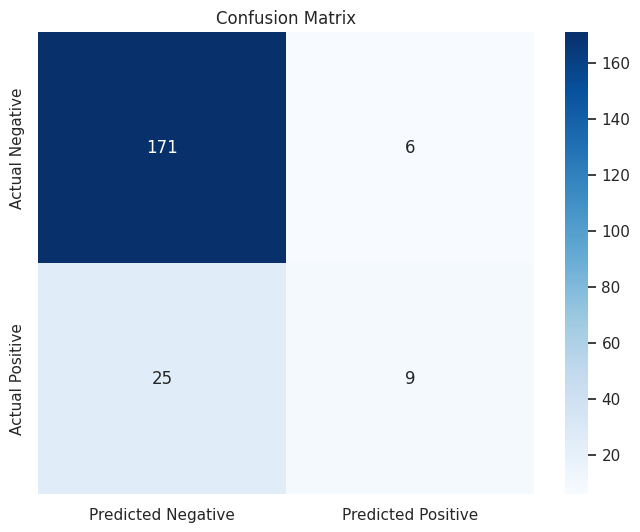

In [174]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on test data
yf2_pred = lr2_female.predict(Xf_test)
yf2_proba = lr2_female.predict_proba(Xf_test)[:, 1]

# Calculate precision, recall, f1-score, and AUC
precision = precision_score(yf_test, yf2_pred)
recall = recall_score(yf_test, yf2_pred)
f1 = f1_score(yf_test, yf2_pred)
auc = roc_auc_score(yf_test, yf2_proba)

print(f"Precision: {precision:.2}")
print(f"Recall: {recall:.2}")
print(f"F1-Score: {f1:.2}")
print(f"AUC: {auc:.2}\n\n")

# Calculate confusion matrix
cm = confusion_matrix(yf_test, yf2_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.show()

In [175]:
lrf2_metrics_values = [precision, recall, f1, auc]

Precision: 0.5
Recall: 0.029
F1-score: 0.056
New Confusion Matrix:




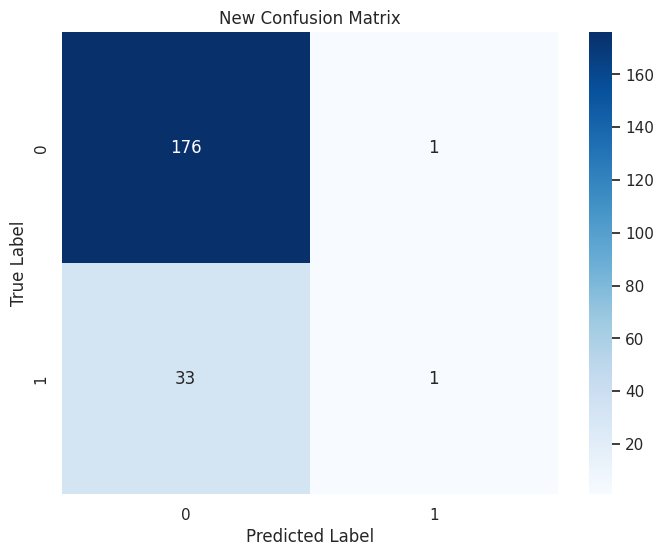

In [176]:
# Adjust the threshold
new_threshold = 0.81

# Apply new threshold to predicted probabilities to get binary predictions
new_y2_pred = (yf2_proba > new_threshold).astype(int)

# Evaluate the model with the new threshold
precision = precision_score(yf_test, new_y2_pred)
recall = recall_score(yf_test, new_y2_pred)
f1 = f1_score(yf_test, new_y2_pred)
new_conf_matrix = confusion_matrix(yf_test, new_y2_pred)

# Print evaluation metrics
print("Precision:", f'{precision:.2}')
print("Recall:", f'{recall:.2}')
print("F1-score:", f'{f1:.2}')
print("New Confusion Matrix:")
print('\n')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(new_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('New Confusion Matrix')
plt.show()

**Model 2: Random Forest Classifier**


---



In [177]:
from sklearn.ensemble import RandomForestClassifier

rff2_pipeline = Pipeline([
    ('prep', preprocessor),
    ('est', RandomForestClassifier(random_state=42))
])

params = {
    'est__n_estimators': [100, 200, 300],
    'est__max_depth': [1, 2, 5, 10]}

rff2_grid = GridSearchCV(rff2_pipeline, params, cv=5, return_train_score=True)
rff2_grid.fit(Xf_train, yf_train)
print(f"Train Score: {rff2_grid.score(Xf_train, yf_train):.2}")
print(f"Test Score: {rff2_grid.score(Xf_test, yf_test):.2}")

Train Score: 1.0
Test Score: 0.83


In [178]:
rff2_grid.best_params_

{'est__max_depth': 10, 'est__n_estimators': 300}

In [179]:
rff2 = RandomForestClassifier(random_state=42, n_estimators = 100, max_depth = 5)

rf2_female = Pipeline([
    ('prep', preprocessor),
    ('est', rff2)
])

rf2_female.fit(Xf_train, yf_train)
print(f"Train Score: {rf2_female.score(Xf_train, yf_train):.2}")
print(f"Test Score: {rf2_female.score(Xf_test, yf_test):.2}")

Train Score: 0.91
Test Score: 0.85


Precision: 0.58
Recall: 0.21
F1-Score: 0.3
AUC: 0.83



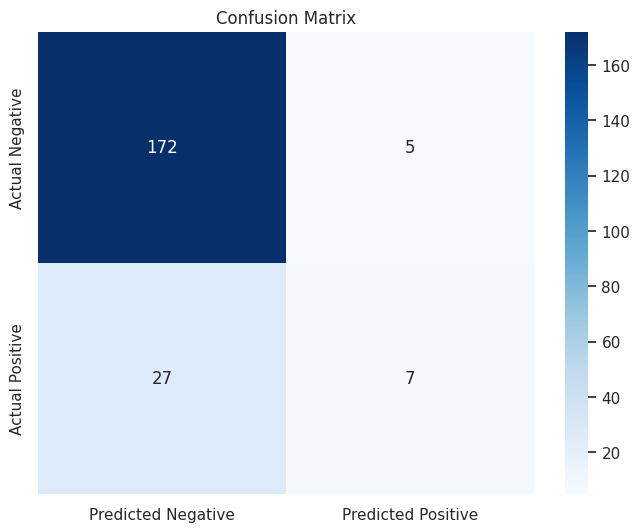

In [180]:
# Make predictions on test data
yf2_pred = rf2_female.predict(Xf_test)
yf2_proba = rf2_female.predict_proba(Xf_test)[:, 1]

# Calculate precision, recall, f1-score, and AUC
precision = precision_score(yf_test, yf2_pred)
recall = recall_score(yf_test, yf2_pred)
f1 = f1_score(yf_test, yf2_pred)
auc = roc_auc_score(yf_test, yf2_proba)

print(f"Precision: {precision:.2}")
print(f"Recall: {recall:.2}")
print(f"F1-Score: {f1:.2}")
print(f"AUC: {auc:.2}\n")

# Calculate confusion matrix
cm = confusion_matrix(yf_test, yf2_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.show()

In [181]:
rff2_metrics_values = [precision, recall, f1, auc]

Precision: 0.57
Recall: 0.12
F1-score: 0.2
New Confusion Matrix:




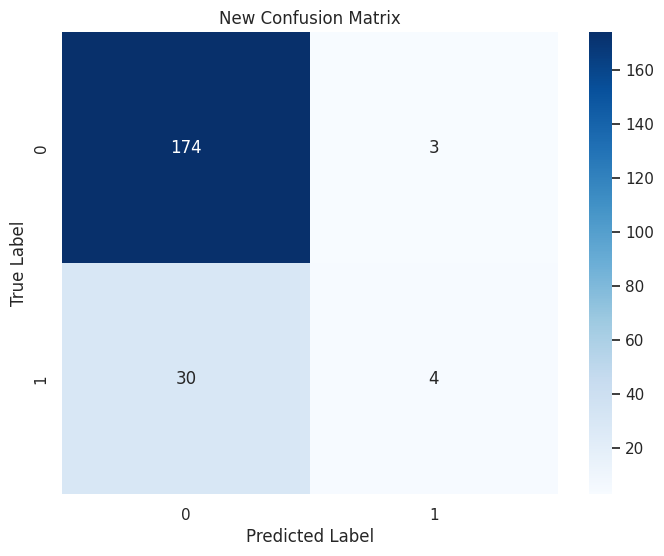

In [182]:
# Adjust the threshold
new_threshold = 0.6

# Apply new threshold to predicted probabilities to get binary predictions
new_y2_pred = (yf2_proba > new_threshold).astype(int)

# Evaluate the model with the new threshold
precision = precision_score(yf_test, new_y2_pred)
recall = recall_score(yf_test, new_y2_pred)
f1 = f1_score(yf_test, new_y2_pred)
new_conf_matrix = confusion_matrix(yf_test, new_y2_pred)

# Print evaluation metrics
print("Precision:", f'{precision:.2}')
print("Recall:", f'{recall:.2}')
print("F1-score:", f'{f1:.2}')
print("New Confusion Matrix:")
print('\n')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(new_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('New Confusion Matrix')
plt.show()

**Model 3: Gradient Boosting**


---



In [183]:
from sklearn.ensemble import GradientBoostingClassifier

gbf2_pipeline = Pipeline([
    ('prep', preprocessor),
    ('est', GradientBoostingClassifier(random_state=42))
])

params = {'est__n_estimators': [50, 60, 70, 80, 90, 100, 150, 200],
          'est__learning_rate': [0.01, 0.1, 0.5, 1],
          'est__max_depth': [1, 2, 3, 4, 5]}

gbf2_grid = GridSearchCV(gbf2_pipeline, params, cv=5, return_train_score=True)
gbf2_grid.fit(Xf_train, yf_train)
print(f"Train Score: {gbf2_grid.score(Xf_train, yf_train):.2}")
print(f"Test Score: {gbf2_grid.score(Xf_test, yf_test):.2}")

Train Score: 1.0
Test Score: 0.83


In [184]:
gbf2_grid.best_params_

{'est__learning_rate': 0.5, 'est__max_depth': 5, 'est__n_estimators': 90}

In [185]:
gb2_f = GradientBoostingClassifier(random_state=42, n_estimators = 100, max_depth = 1, learning_rate=0.1)

gb2_female = Pipeline([
    ('prep', preprocessor),
    ('est', gb2_f)
])

gb2_female.fit(Xf_train, yf_train)
print(f"Train Score: {gb2_female.score(Xf_train, yf_train):.2}")
print(f"Test Score: {gb2_female.score(Xf_test, yf_test):.2}")

Train Score: 0.9
Test Score: 0.84


Precision: 0.53
Recall: 0.26
F1-Score: 0.35
AUC: 0.82



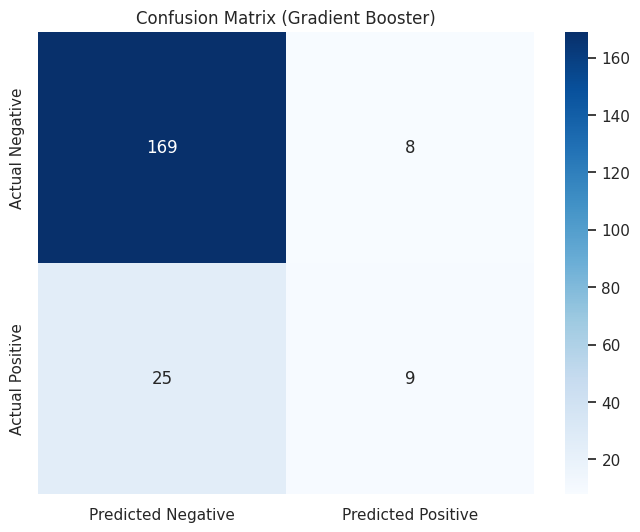

In [186]:
# Make predictions on test data
yf2_pred = gb2_female.predict(Xf_test)
yf2_proba = gb2_female.predict_proba(Xf_test)[:, 1]

# Calculate precision, recall, f1-score, and AUC
precision = precision_score(yf_test, yf2_pred)
recall = recall_score(yf_test, yf2_pred)
f1 = f1_score(yf_test, yf2_pred)
auc = roc_auc_score(yf_test, yf2_proba)

print(f"Precision: {precision:.2}")
print(f"Recall: {recall:.2}")
print(f"F1-Score: {f1:.2}")
print(f"AUC: {auc:.2}\n")

# Calculate confusion matrix
cm = confusion_matrix(yf_test, yf2_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix (Gradient Booster)')
plt.show()

In [187]:
gbf2_metrics_values = [precision, recall, f1, auc]

Precision: 0.8
Recall: 0.12
F1-score: 0.21
New Confusion Matrix:




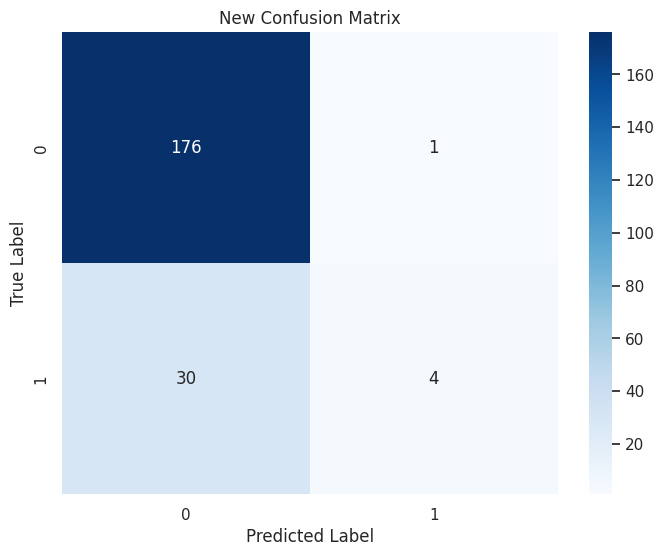

In [188]:
# Adjust the threshold
new_threshold = 0.7

# Apply new threshold to predicted probabilities to get binary predictions
new_y2_pred = (yf2_proba > new_threshold).astype(int)

# Evaluate the model with the new threshold
precision = precision_score(yf_test, new_y2_pred)
recall = recall_score(yf_test, new_y2_pred)
f1 = f1_score(yf_test, new_y2_pred)
new_conf_matrix = confusion_matrix(yf_test, new_y2_pred)

# Print evaluation metrics
print("Precision:", f'{precision:.2}')
print("Recall:", f'{recall:.2}')
print("F1-score:", f'{f1:.2}')
print("New Confusion Matrix:")
print('\n')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(new_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('New Confusion Matrix')
plt.show()

**Model Performance Comparison**


---



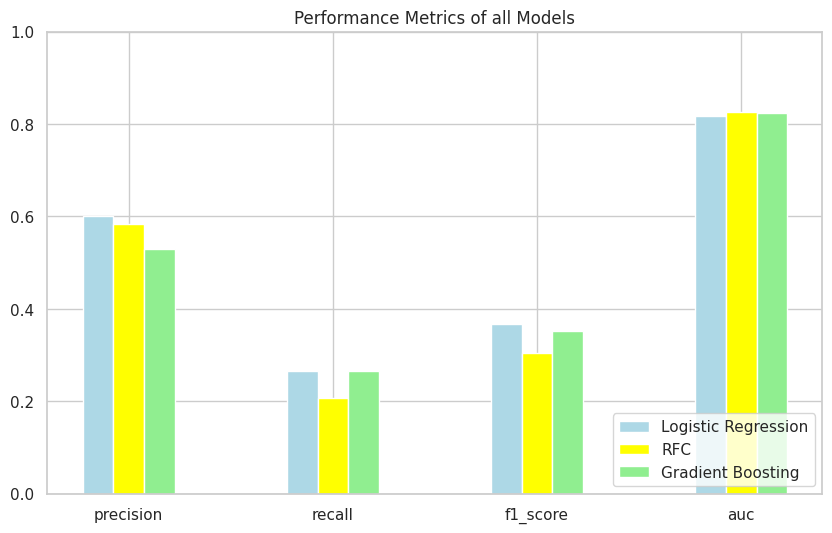

In [189]:
# Plotting the evaluation results
metrics_names = ['precision', 'recall', 'f1_score', 'auc']

x = np.arange(len(metrics_names))
bar_width = 0.15

plt.figure(figsize=(10, 6))

# Logistic Regressor
plt.bar(x - bar_width, lrf2_metrics_values, width=bar_width, color='lightblue', label='Logistic Regression')

# Random Forest Classifier
plt.bar(x, rff2_metrics_values, width=bar_width, color='yellow', label='RFC')

# Gradient Booster
plt.bar(x + bar_width, gbf2_metrics_values, width=bar_width, color='lightgreen', label='Gradient Boosting')


plt.xticks(x, metrics_names)
plt.title('Performance Metrics of all Models')
plt.ylim(0.0, 1.0)
plt.legend(loc='lower right')
plt.show()

# Diagnosis Level 3 - Female

In [190]:
data_female.shape

(843, 20)

In [191]:
Xf = data_female.drop(['SARCOPENIA', 'Gender'], axis = 1)

In [192]:
yf = data_female.SARCOPENIA

In [193]:
Xf.shape, yf.shape

((843, 18), (843,))

In [194]:
Xf.head()

Age  Weight   Height     Hip Smoking   Smoking (packet/year)   Alcohol DM   \
0   64     66.0    155.0  104.0     0.0                       0         0   0   
1   53     55.0    150.0   97.0     0.0                       0         0   0   
2   56     56.0    150.0  125.0     0.0                       0         0   0   
3   58     75.0    160.0    NaN     0.0                       0         0   1   
4   55     72.0    157.0  104.0     1.0                       4         0   0   

  ASTIM HT    Education Working Status  Exercise LowCST   CST  Gait speed  \
0   0.0  0  high school        retired         0    0.0   8.1        1.28   
1   0.0  0          NaN            NaN       NaN    0.0   8.0        1.47   
2   0.0  1   illiterate        retired         0    0.0  11.7        0.80   
3   0.0  1   illiterate     unemployed         0    1.0  18.0        1.34   
4   NaN  0        other     unemployed  1-2/week    NaN  10.9        1.09   

  Low grip strength  Grip strength  
0               0.0           28.0  
1               1.0           16.0  
2               0.0           23.0  
3               0.0           23.0  
4               NaN           21.0

In [195]:
Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf,yf, random_state=0, stratify=yf)

In [196]:
categorical = Xf_train.dtypes == object
numerical = Xf_train.dtypes != object

In [197]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical),
        ('cat', categorical_pipeline, categorical)
    ])

**Model 1: Logistic Regression**


---



In [198]:
from sklearn.model_selection import GridSearchCV

lrf3_pipeline = Pipeline([
    ('prep', preprocessor),
    ('est', LogisticRegression(solver='liblinear', random_state=42, max_iter=10000, penalty='l1'))
])

params = {
    'est__C': [0.1, 0.2, 0.3, 0.5, 1.0, 10]}

lrf3_grid = GridSearchCV(lrf3_pipeline, params, cv=5, return_train_score=True)
lrf3_grid.fit(Xf_train, yf_train)
print(f"Train Score: {lrf3_grid.score(Xf_train, yf_train):.2}")
print(f"Test Score: {lrf3_grid.score(Xf_test, yf_test):.2}")

Train Score: 0.88
Test Score: 0.86


In [199]:
lrf3_grid.best_params_

{'est__C': 1.0}

In [200]:
lr3_f = LogisticRegression(solver='liblinear', random_state=42, max_iter=10000, penalty='l1', C=1.0)

lr3_female = Pipeline([
    ('prep', preprocessor),
    ('est', lr3_f)
])

lr3_female.fit(Xf_train, yf_train)
print(f"Train Score: {lr3_female.score(Xf_train, yf_train):.2}")
print(f"Test Score: {lr3_female.score(Xf_test, yf_test):.2}")

Train Score: 0.88
Test Score: 0.86


Precision: 0.6
Recall: 0.35
F1-Score: 0.44
AUC: 0.87




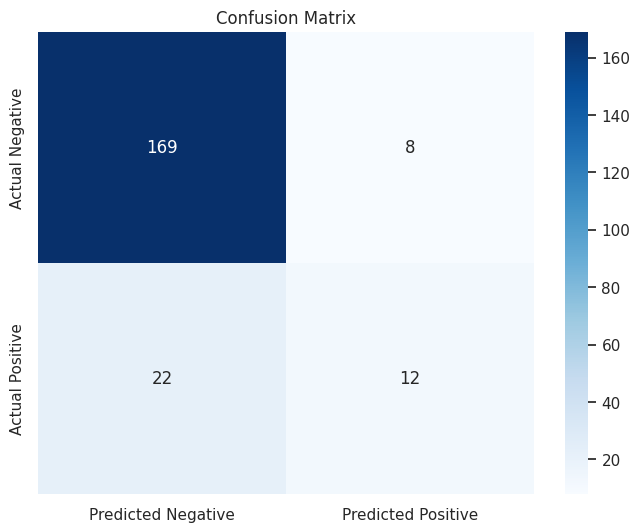

In [201]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on test data
yf3_pred = lr3_female.predict(Xf_test)
yf3_proba = lr3_female.predict_proba(Xf_test)[:, 1]

# Calculate precision, recall, f1-score, and AUC
precision = precision_score(yf_test, yf3_pred)
recall = recall_score(yf_test, yf3_pred)
f1 = f1_score(yf_test, yf3_pred)
auc = roc_auc_score(yf_test, yf3_proba)

print(f"Precision: {precision:.2}")
print(f"Recall: {recall:.2}")
print(f"F1-Score: {f1:.2}")
print(f"AUC: {auc:.2}\n\n")

# Calculate confusion matrix
cm = confusion_matrix(yf_test, yf3_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.show()

In [202]:
lrf3_metrics_values = [precision, recall, f1, auc]

Precision: 0.71
Recall: 0.29
F1-score: 0.42
New Confusion Matrix:




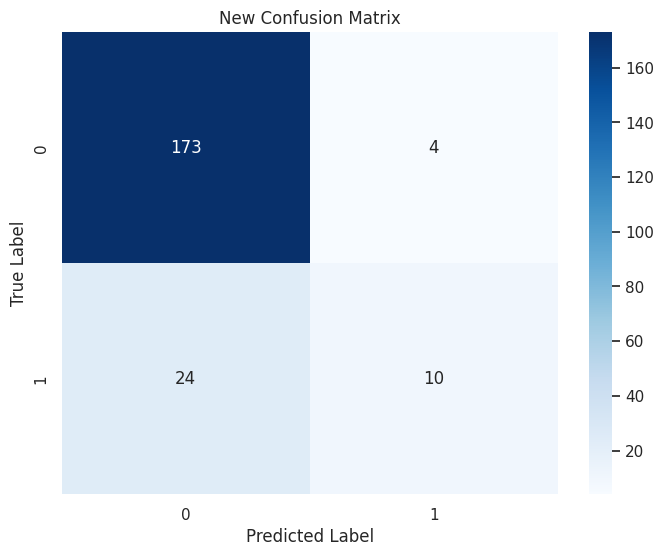

In [203]:
# Adjust the threshold
new_threshold = 0.6

# Apply new threshold to predicted probabilities to get binary predictions
new_y3_pred = (yf3_proba > new_threshold).astype(int)

# Evaluate the model with the new threshold
precision = precision_score(yf_test, new_y3_pred)
recall = recall_score(yf_test, new_y3_pred)
f1 = f1_score(yf_test, new_y3_pred)
new_conf_matrix = confusion_matrix(yf_test, new_y3_pred)

# Print evaluation metrics
print("Precision:", f'{precision:.2}')
print("Recall:", f'{recall:.2}')
print("F1-score:", f'{f1:.2}')
print("New Confusion Matrix:")
print('\n')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(new_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('New Confusion Matrix')
plt.show()

**Model 2: Random Forest Classifier**


---



In [204]:
from sklearn.ensemble import RandomForestClassifier

rff3_pipeline = Pipeline([
    ('prep', preprocessor),
    ('est', RandomForestClassifier(random_state=42))
])

params = {
    'est__n_estimators': [100, 200, 300],
    'est__max_depth': [1, 2, 5, 10]}

rff3_grid = GridSearchCV(rff3_pipeline, params, cv=5, return_train_score=True)
rff3_grid.fit(Xf_train, yf_train)
print(f"Train Score: {rff3_grid.score(Xf_train, yf_train):.2}")
print(f"Test Score: {rff3_grid.score(Xf_test, yf_test):.2}")

Train Score: 1.0
Test Score: 0.87


In [205]:
rff3_grid.best_params_

{'est__max_depth': 10, 'est__n_estimators': 100}

In [206]:
rff3 = RandomForestClassifier(random_state=42, n_estimators = 100, max_depth = 5)

rf3_female = Pipeline([
    ('prep', preprocessor),
    ('est', rff3)
])

rf3_female.fit(Xf_train, yf_train)
print(f"Train Score: {rf3_female.score(Xf_train, yf_train):.2}")
print(f"Test Score: {rf3_female.score(Xf_test, yf_test):.2}")

Train Score: 0.92
Test Score: 0.86


Precision: 0.73
Recall: 0.24
F1-Score: 0.36
AUC: 0.88



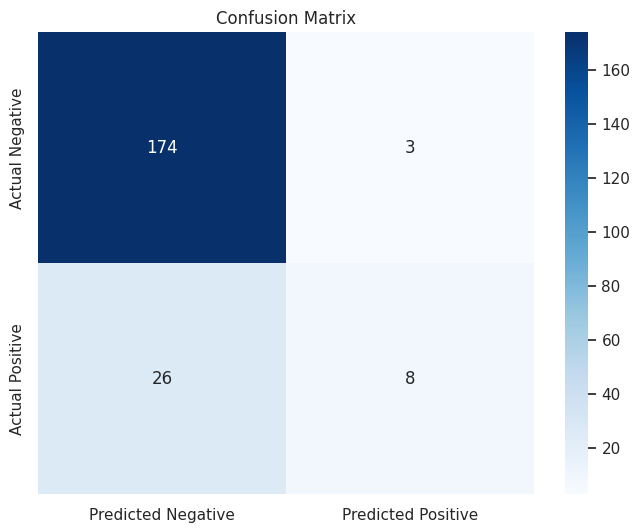

In [207]:
# Make predictions on test data
yf3_pred = rf3_female.predict(Xf_test)
yf3_proba = rf3_female.predict_proba(Xf_test)[:, 1]

# Calculate precision, recall, f1-score, and AUC
precision = precision_score(yf_test, yf3_pred)
recall = recall_score(yf_test, yf3_pred)
f1 = f1_score(yf_test, yf3_pred)
auc = roc_auc_score(yf_test, yf3_proba)

print(f"Precision: {precision:.2}")
print(f"Recall: {recall:.2}")
print(f"F1-Score: {f1:.2}")
print(f"AUC: {auc:.2}\n")

# Calculate confusion matrix
cm = confusion_matrix(yf_test, yf3_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.show()

In [208]:
rff3_metrics_values = [precision, recall, f1, auc]

Precision: 0.6
Recall: 0.088
F1-score: 0.15
New Confusion Matrix:




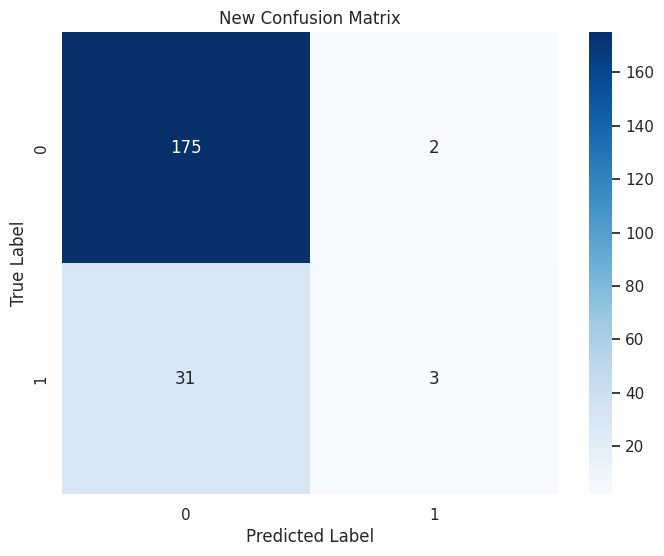

In [209]:
# Adjust the threshold
new_threshold = 0.6

# Apply new threshold to predicted probabilities to get binary predictions
new_y3_pred = (yf3_proba > new_threshold).astype(int)

# Evaluate the model with the new threshold
precision = precision_score(yf_test, new_y3_pred)
recall = recall_score(yf_test, new_y3_pred)
f1 = f1_score(yf_test, new_y3_pred)
new_conf_matrix = confusion_matrix(yf_test, new_y3_pred)

# Print evaluation metrics
print("Precision:", f'{precision:.2}')
print("Recall:", f'{recall:.2}')
print("F1-score:", f'{f1:.2}')
print("New Confusion Matrix:")
print('\n')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(new_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('New Confusion Matrix')
plt.show()

**Model 3: Gradient Boosting**


---



In [210]:
from sklearn.ensemble import GradientBoostingClassifier

gbf3_pipeline = Pipeline([
    ('prep', preprocessor),
    ('est', GradientBoostingClassifier(random_state=42))
])

params = {'est__n_estimators': [50, 60, 70, 80, 90, 100, 150, 200],
          'est__learning_rate': [0.01, 0.1, 0.5, 1],
          'est__max_depth': [1, 2, 3, 4, 5]}

gbf3_grid = GridSearchCV(gbf3_pipeline, params, cv=5, return_train_score=True)
gbf3_grid.fit(Xf_train, yf_train)
print(f"Train Score: {gbf3_grid.score(Xf_train, yf_train):.2}")
print(f"Test Score: {gbf3_grid.score(Xf_test, yf_test):.2}")

Train Score: 1.0
Test Score: 0.84


In [211]:
gbf3_grid.best_params_

{'est__learning_rate': 0.5, 'est__max_depth': 5, 'est__n_estimators': 100}

In [212]:
gb3_f = GradientBoostingClassifier(random_state=42, n_estimators = 100, max_depth = 1, learning_rate=0.1)

gb3_female = Pipeline([
    ('prep', preprocessor),
    ('est', gb3_f)
])

gb3_female.fit(Xf_train, yf_train)
print(f"Train Score: {gb3_female.score(Xf_train, yf_train):.2}")
print(f"Test Score: {gb3_female.score(Xf_test, yf_test):.2}")

Train Score: 0.91
Test Score: 0.86


Precision: 0.63
Recall: 0.35
F1-Score: 0.45
AUC: 0.88



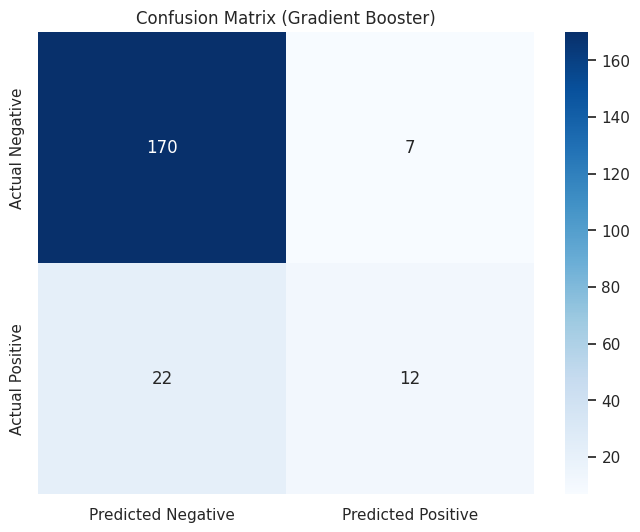

In [213]:
# Make predictions on test data
yf3_pred = gb3_female.predict(Xf_test)
yf3_proba = gb3_female.predict_proba(Xf_test)[:, 1]

# Calculate precision, recall, f1-score, and AUC
precision = precision_score(yf_test, yf3_pred)
recall = recall_score(yf_test, yf3_pred)
f1 = f1_score(yf_test, yf3_pred)
auc = roc_auc_score(yf_test, yf3_proba)

print(f"Precision: {precision:.2}")
print(f"Recall: {recall:.2}")
print(f"F1-Score: {f1:.2}")
print(f"AUC: {auc:.2}\n")

# Calculate confusion matrix
cm = confusion_matrix(yf_test, yf3_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix (Gradient Booster)')
plt.show()

In [214]:
gbf3_metrics_values = [precision, recall, f1, auc]

Precision: 0.6
Recall: 0.088
F1-score: 0.15
New Confusion Matrix:




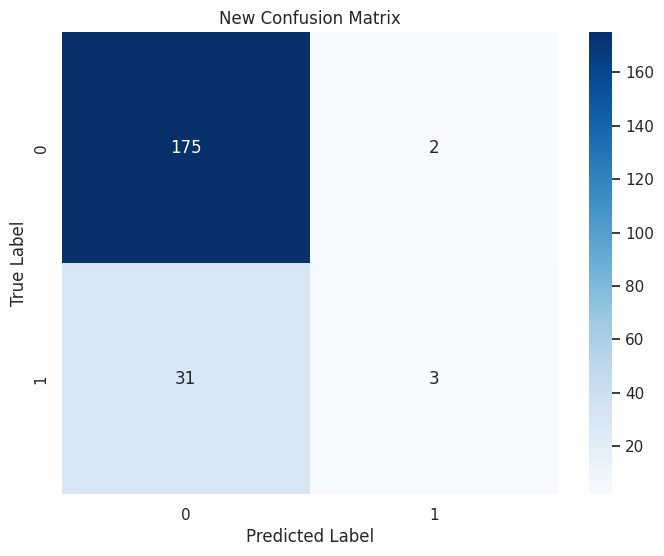

In [215]:
# Adjust the threshold
new_threshold = 0.75

# Apply new threshold to predicted probabilities to get binary predictions
new_y3_pred = (yf3_proba > new_threshold).astype(int)

# Evaluate the model with the new threshold
precision = precision_score(yf_test, new_y3_pred)
recall = recall_score(yf_test, new_y3_pred)
f1 = f1_score(yf_test, new_y3_pred)
new_conf_matrix = confusion_matrix(yf_test, new_y3_pred)

# Print evaluation metrics
print("Precision:", f'{precision:.2}')
print("Recall:", f'{recall:.2}')
print("F1-score:", f'{f1:.2}')
print("New Confusion Matrix:")
print('\n')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(new_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('New Confusion Matrix')
plt.show()

**Model Performance Comparison**


---



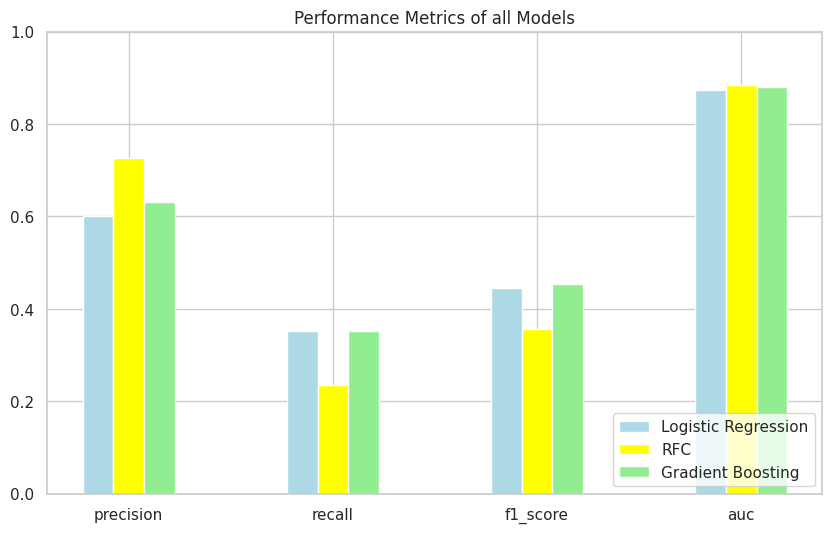

In [216]:
# Plotting the evaluation results
metrics_names = ['precision', 'recall', 'f1_score', 'auc']

x = np.arange(len(metrics_names))
bar_width = 0.15

plt.figure(figsize=(10, 6))

# Logistic Regressor
plt.bar(x - bar_width, lrf3_metrics_values, width=bar_width, color='lightblue', label='Logistic Regression')

# Random Forest Classifier
plt.bar(x, rff3_metrics_values, width=bar_width, color='yellow', label='RFC')

# Gradient Booster
plt.bar(x + bar_width, gbf3_metrics_values, width=bar_width, color='lightgreen', label='Gradient Boosting')


plt.xticks(x, metrics_names)
plt.title('Performance Metrics of all Models')
plt.ylim(0.0, 1.0)
plt.legend(loc='lower right')
plt.show()

From the comparism, we can deduce that XGBoost gives the best result, even considering the fact that other models did better in recall, we are mostly intrested in Precision.The reason we are adjusting the theshold is because adjusting the decision threshold plays a critical role, particularly in the context of minimizing false positives (FP). The primary goal here is to ensure that individuals who do not have the disease (sarcopenia) are not incorrectly diagnosed as having it and vice versa.